In [1]:

import torch
#not this is not the same as the other notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2



%autoreload 2
import numpy as np
from run_pathway_analysis import run_complete_pathway_analysis


In [8]:
# Load MGB model and extract data for transition analysis
print("=== LOADING MGB MODEL DATA ===")

# Load the MGB model
mgb_model_path = '/Users/sarahurbut/Dropbox-Personal//model_with_kappa_bigam_MGB.pt'
mgb_data = torch.load(mgb_model_path, map_location=torch.device('cpu'))

print(f"Model keys: {list(mgb_data.keys())}")

# Extract key components
lambda_mgb = mgb_data['model_state_dict']['lambda_'].detach().numpy()
Y_mgb = mgb_data['Y']
disease_names_mgb = mgb_data['disease_names']

# Convert disease names to list if needed
if hasattr(disease_names_mgb, 'values'):
    disease_names_mgb = disease_names_mgb.values.tolist()
elif isinstance(disease_names_mgb, (list, tuple)):
    disease_names_mgb = list(disease_names_mgb)

# Compute thetas from lambda (softmax)
def softmax(x, axis=1):
    exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

thetas_mgb = softmax(lambda_mgb, axis=1)

print(f"MGB Data shapes:")
print(f"  Y: {Y_mgb.shape}")
print(f"  Lambda: {lambda_mgb.shape}")
print(f"  Thetas: {thetas_mgb.shape}")
print(f"  Disease names: {len(disease_names_mgb)} diseases")

# Show some disease names
print(f"\nFirst 10 diseases in MGB:")
for i, name in enumerate(disease_names_mgb[:10]):
    print(f"  {i}: {name}")

# Check for myocardial infarction
mi_candidates = [i for i, name in enumerate(disease_names_mgb) if 'myocardial' in name.lower() or 'infarction' in name.lower() or 'mi' in name.lower()]
print(f"\nMyocardial infarction candidates: {mi_candidates}")
if mi_candidates:
    for idx in mi_candidates:
        print(f"  {idx}: {disease_names_mgb[idx]}")

# Check for rheumatoid arthritis
ra_candidates = [i for i, name in enumerate(disease_names_mgb) if 'rheumatoid' in name.lower() or 'arthritis' in name.lower()]
print(f"\nRheumatoid arthritis candidates: {ra_candidates}")
if ra_candidates:
    for idx in ra_candidates:
        print(f"  {idx}: {disease_names_mgb[idx]}")

# Check for diabetes
diabetes_candidates = [i for i, name in enumerate(disease_names_mgb) if 'diabetes' in name.lower() or 'diabetic' in name.lower()]
print(f"\nDiabetes candidates: {diabetes_candidates}")
if diabetes_candidates:
    for idx in diabetes_candidates:
        print(f"  {idx}: {disease_names_mgb[idx]}")


=== LOADING MGB MODEL DATA ===
Model keys: ['model_state_dict', 'clusters', 'psi', 'Y', 'prevalence_t', 'logit_prevalence_t', 'G', 'E', 'disease_names', 'hyperparameters']
MGB Data shapes:
  Y: (34592, 346, 51)
  Lambda: (34592, 21, 51)
  Thetas: (34592, 21, 51)
  Disease names: 346 diseases

First 10 diseases in MGB:
  0: Bacterial enteritis
  1: Viral Enteritis
  2: Gram negative septicemia
  3: Bacterial infection NOS
  4: Staphylococcus infections
  5: Streptococcus infection
  6: E. coli
  7: Viral warts & HPV
  8: Viral infection
  9: Candidiasis

Myocardial infarction candidates: [2, 48, 50, 51, 52, 55, 56, 57, 59, 61, 62, 76, 77, 106, 112, 115, 116, 128, 133, 134, 135, 137, 141, 142, 316, 320, 341]
  2: Gram negative septicemia
  48: Type 2 diabetes with ophthalmic manifestations
  50: Hypoglycemia
  51: Hyperlipidemia
  52: Hypercholesterolemia
  55: Hyposmolality and/or hyponatremia
  56: Hyperpotassemia
  57: Hypopotassemia
  59: Hypovolemia
  61: Iron deficiency anemias, un

In [20]:
# Import transition analysis functions
import sys
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')

from transition_signature_analysis import (
    find_disease_transitions, 
    analyze_signature_patterns_by_transition,
    visualize_transition_signature_patterns,
    run_transition_analysis
)

print("Transition analysis functions imported successfully!")


Transition analysis functions imported successfully!


=== RUNNING MGB TRANSITION ANALYSIS ===
TRANSITION SIGNATURE ANALYSIS: MYOCARDIAL INFARCTION
=== FINDING DISEASE TRANSITIONS TO MYOCARDIAL INFARCTION ===
Target disease: Myocardial infarction (index 112)
Found transition disease: Rheumatoid arthritis (index 295)
Found transition disease: Type 1 diabetes (index 46)
Found 2761 patients with myocardial infarction

=== TRANSITION GROUP SUMMARY ===
rheumatoid arthritis: 99 patients
diabetes: 58 patients
no_transition: 2609 patients

=== ANALYZING SIGNATURE PATTERNS BY TRANSITION (PER-TIMEPOINT) ===
Computing population reference (sig_refs)...
Population reference shape: (21, 51)
Processing 3 transition groups...

DEBUG: Filtering statistics:
  rheumatoid arthritis: 50/51 timepoints have valid data
    Sample patient ages at target: [61, 79, 59]
    Sample target time indices: [31, 49, 29]
  diabetes: 49/51 timepoints have valid data
  no_transition: 50/51 timepoints have valid data

rheumatoid arthritis (99 patients):
  Top 5 signatures (by

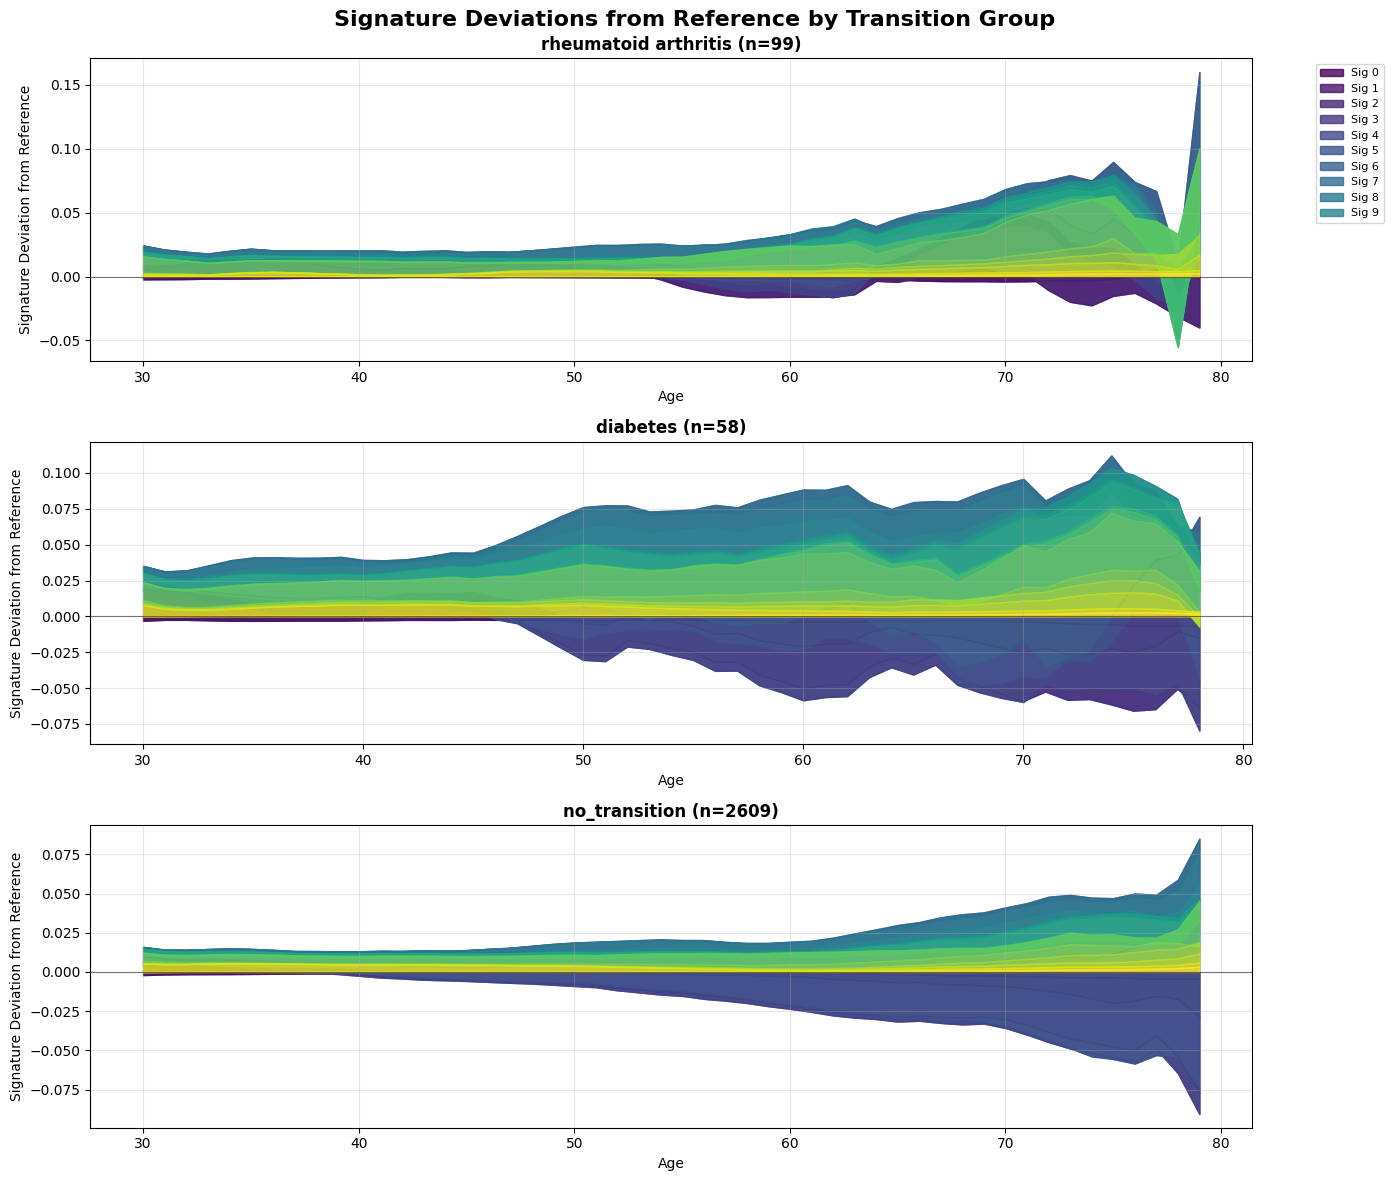

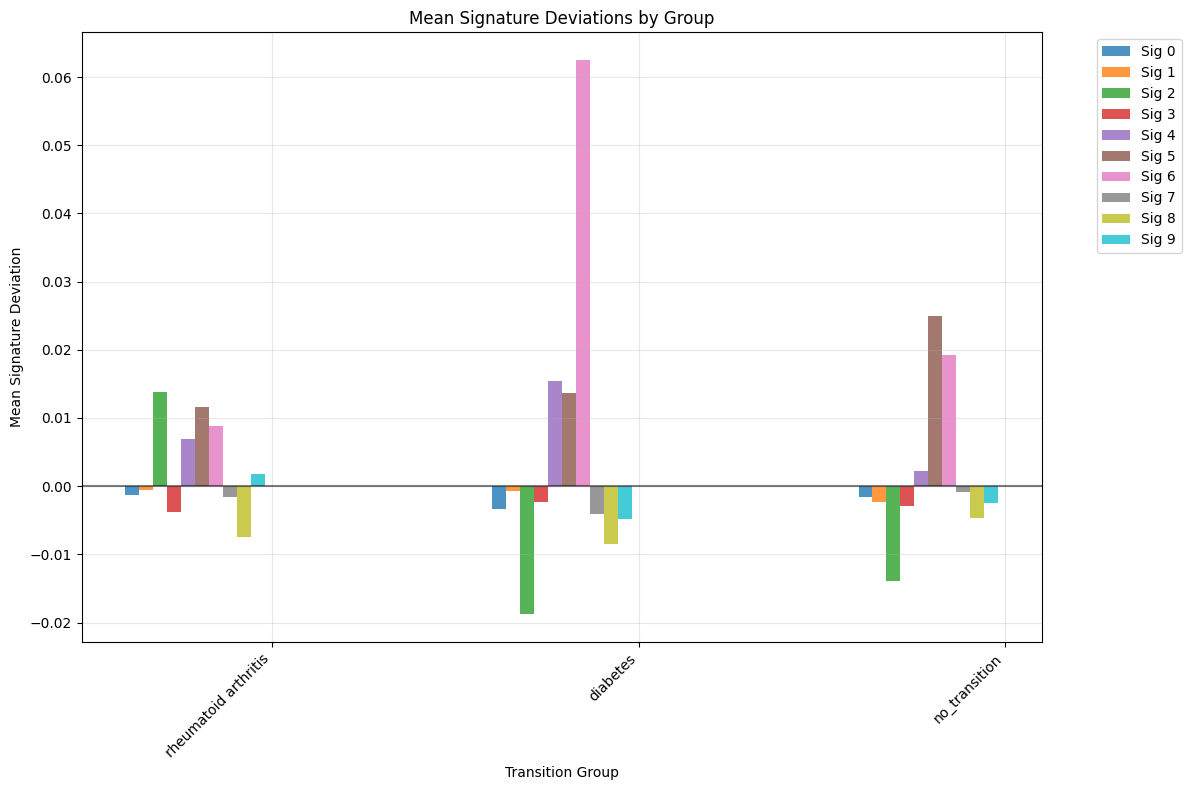

✅ Created R-style visualizations for 3 transition groups
✅ MGB transition analysis completed successfully!
Found 3 transition groups


In [ ]:
# Run MGB Transition Analysis
print("=== RUNNING MGB TRANSITION ANALYSIS ===")

# Define target disease and transition diseases for MGB
# Based on the disease candidates we found, let's use appropriate indices
target_disease_mgb = "myocardial infarction"  # We'll find the exact name
transition_diseases_mgb = ["rheumatoid arthritis", "diabetes"]  # We'll find exact names

# Convert Y to torch tensor for the analysis functions
Y_mgb_torch = torch.from_numpy(Y_mgb)

# Run the complete transition analysis
mgb_results = run_transition_analysis(
    target_disease=target_disease_mgb,
    transition_diseases=transition_diseases_mgb,
    Y=Y_mgb_torch,
    thetas=thetas_mgb,
    disease_names=disease_names_mgb,
    processed_ids=None
)

if mgb_results is not None:
    print("✅ MGB transition analysis completed successfully!")
    print(f"Found {len(mgb_results['transition_data']['transition_groups'])} transition groups")
else:
    print("❌ MGB transition analysis failed")


In [ ]:
# Explore MGB disease names more thoroughly
print("=== EXPLORING MGB DISEASE NAMES ===")

# Search for cardiovascular diseases
cv_keywords = ['cardio', 'heart', 'myocardial', 'infarction', 'stroke', 'cerebrovascular', 'coronary']
cv_diseases = []
for i, name in enumerate(disease_names_mgb):
    if any(keyword in name.lower() for keyword in cv_keywords):
        cv_diseases.append((i, name))

print(f"\nCardiovascular diseases found ({len(cv_diseases)}):")
for idx, name in cv_diseases:
    print(f"  {idx}: {name}")

# Search for inflammatory/autoimmune diseases
inflammatory_keywords = ['rheumatoid', 'arthritis', 'lupus', 'inflammatory', 'autoimmune']
inflammatory_diseases = []
for i, name in enumerate(disease_names_mgb):
    if any(keyword in name.lower() for keyword in inflammatory_keywords):
        inflammatory_diseases.append((i, name))

print(f"\nInflammatory/autoimmune diseases found ({len(inflammatory_diseases)}):")
for idx, name in inflammatory_diseases:
    print(f"  {idx}: {name}")

# Search for metabolic diseases
metabolic_keywords = ['diabetes', 'diabetic', 'metabolic', 'obesity', 'hyperlipidemia']
metabolic_diseases = []
for i, name in enumerate(disease_names_mgb):
    if any(keyword in name.lower() for keyword in metabolic_keywords):
        metabolic_diseases.append((i, name))

print(f"\nMetabolic diseases found ({len(metabolic_diseases)}):")
for idx, name in metabolic_diseases:
    print(f"  {idx}: {name}")

# Let's pick the most relevant diseases for our analysis
if cv_diseases:
    target_disease_idx = cv_diseases[0][0]  # First cardiovascular disease
    target_disease_name = cv_diseases[0][1]
    print(f"\nSelected target disease: {target_disease_name} (index {target_disease_idx})")
else:
    print("\nNo cardiovascular diseases found!")

transition_diseases_selected = []
if inflammatory_diseases:
    transition_diseases_selected.append(inflammatory_diseases[0][1])
    print(f"Selected inflammatory transition disease: {inflammatory_diseases[0][1]}")

if metabolic_diseases:
    transition_diseases_selected.append(metabolic_diseases[0][1])
    print(f"Selected metabolic transition disease: {metabolic_diseases[0][1]}")

print(f"\nSelected transition diseases: {transition_diseases_selected}")


=== EXPLORING MGB DISEASE NAMES ===

Cardiovascular diseases found (14):
  105: Rheumatic disease of the heart valves
  111: Unstable angina (intermediate coronary syndrome)
  112: Myocardial infarction
  114: Coronary atherosclerosis
  115: Other chronic ischemic heart disease, unspecified
  116: Other acute and subacute forms of ischemic heart disease
  117: Other forms of chronic heart disease
  118: Pulmonary heart disease
  119: Cardiomegaly
  121: Primary/intrinsic cardiomyopathies
  129: Heart failure NOS
  130: Cerebrovascular disease
  133: Cerebral artery occlusion, with cerebral infarction
  136: Late effects of cerebrovascular disease

Inflammatory/autoimmune diseases found (8):
  81: Inflammatory and toxic neuropathy
  164: Postinflammatory pulmonary fibrosis
  263: Noninflammatory disorders of cervix
  264: Noninflammatory disorders of vagina
  265: Noninflammatory disorders of vulva and perineum
  295: Rheumatoid arthritis
  296: Other inflammatory spondylopathies
  323:

=== RUNNING MGB TRANSITION ANALYSIS WITH SELECTED DISEASES ===
Target disease: Rheumatic disease of the heart valves
Transition diseases: ['Inflammatory and toxic neuropathy', 'Type 1 diabetes']
TRANSITION SIGNATURE ANALYSIS: RHEUMATIC DISEASE OF THE HEART VALVES
=== FINDING DISEASE TRANSITIONS TO RHEUMATIC DISEASE OF THE HEART VALVES ===
Target disease: Rheumatic disease of the heart valves (index 105)
Found transition disease: Inflammatory and toxic neuropathy (index 81)
Found transition disease: Type 1 diabetes (index 46)
Found 423 patients with Rheumatic disease of the heart valves

=== TRANSITION GROUP SUMMARY ===
Inflammatory and toxic neuropathy: 47 patients
Type 1 diabetes: 8 patients
no_transition: 369 patients

=== ANALYZING SIGNATURE PATTERNS BY TRANSITION (PER-TIMEPOINT) ===
Computing population reference (sig_refs)...
Population reference shape: (21, 51)
Processing 3 transition groups...

DEBUG: Filtering statistics:
  Inflammatory and toxic neuropathy: 50/51 timepoints ha

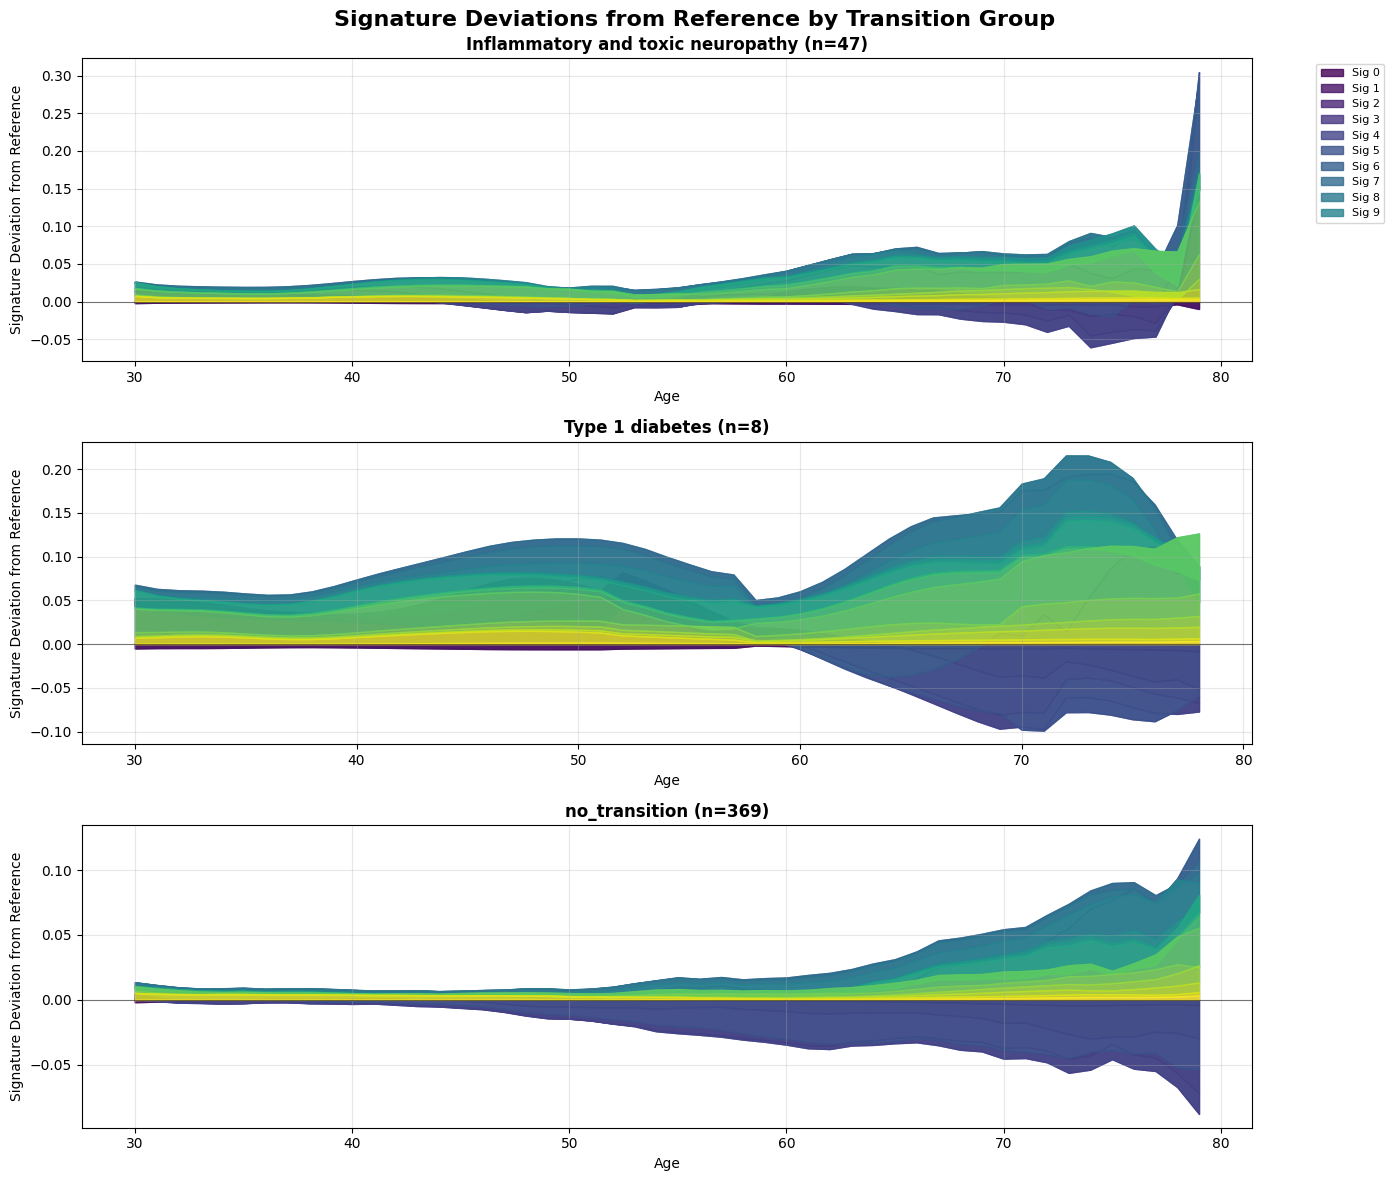

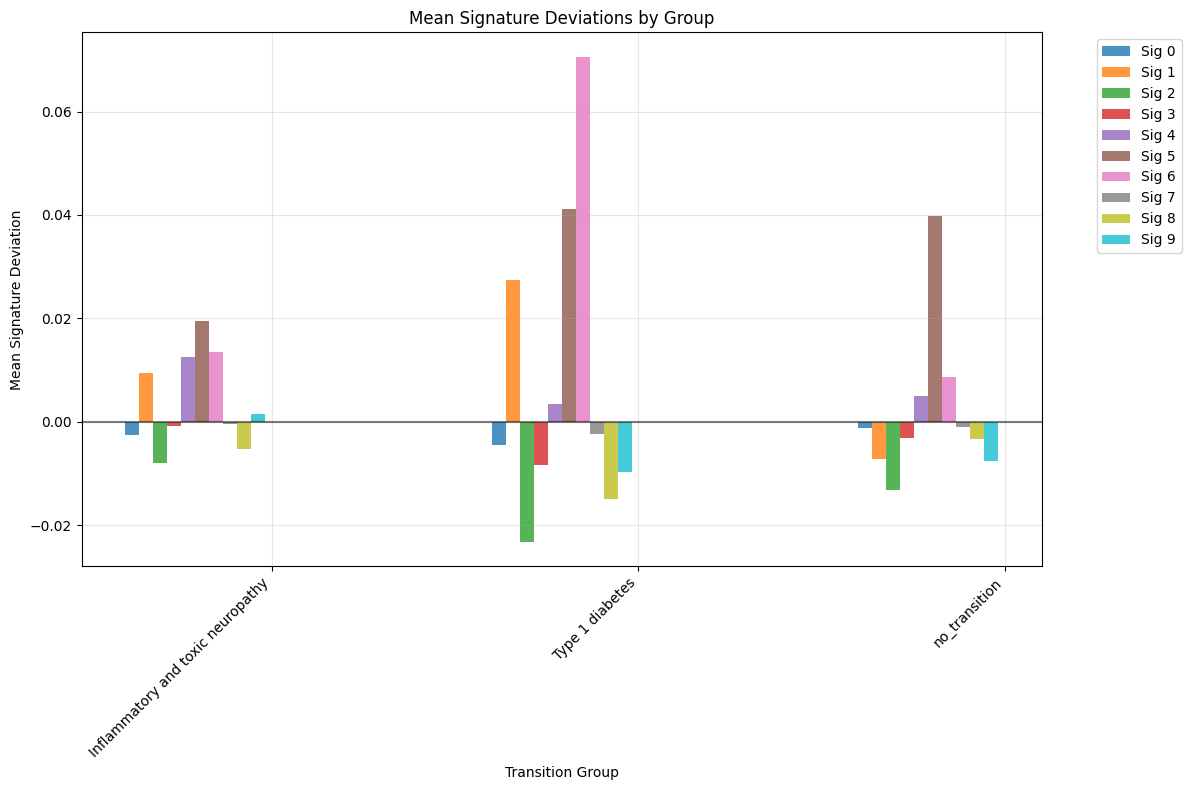

✅ Created R-style visualizations for 3 transition groups
✅ MGB transition analysis completed successfully!

=== MGB TRANSITION RESULTS ===
Target disease: Rheumatic disease of the heart valves
Target disease index: 105

Transition groups:
  Inflammatory and toxic neuropathy: 47 patients
  Type 1 diabetes: 8 patients
  no_transition: 369 patients

Signature analysis groups:
  Inflammatory and toxic neuropathy: 47 patients
    Top signature deviations:
      1. Signature 5: +0.0194 ↑
      2. Signature 15: -0.0180 ↓
      3. Signature 6: +0.0135 ↑
  Type 1 diabetes: 8 patients
    Top signature deviations:
      1. Signature 6: +0.0706 ↑
      2. Signature 5: +0.0411 ↑
      3. Signature 15: -0.0315 ↓
  no_transition: 369 patients
    Top signature deviations:
      1. Signature 5: +0.0398 ↑
      2. Signature 2: -0.0133 ↓
      3. Signature 6: +0.0086 ↑


In [ ]:
# Run MGB Transition Analysis with Selected Diseases
print("=== RUNNING MGB TRANSITION ANALYSIS WITH SELECTED DISEASES ===")

if 'target_disease_name' in locals() and transition_diseases_selected:
    print(f"Target disease: {target_disease_name}")
    print(f"Transition diseases: {transition_diseases_selected}")
    
    # Convert Y to torch tensor for the analysis functions
    Y_mgb_torch = torch.from_numpy(Y_mgb)
    
    # Run the complete transition analysis
    mgb_results = run_transition_analysis(
        target_disease=target_disease_name,
        transition_diseases=transition_diseases_selected,
        Y=Y_mgb_torch,
        thetas=thetas_mgb,
        disease_names=disease_names_mgb,
        processed_ids=None
    )
    
    if mgb_results is not None:
        print("✅ MGB transition analysis completed successfully!")
        
        # Print detailed results
        transition_data = mgb_results['transition_data']
        signature_analysis = mgb_results['signature_analysis']
        
        print(f"\n=== MGB TRANSITION RESULTS ===")
        print(f"Target disease: {transition_data['target_disease']}")
        print(f"Target disease index: {transition_data['target_idx']}")
        
        print(f"\nTransition groups:")
        for group_name, patients in transition_data['transition_groups'].items():
            print(f"  {group_name}: {len(patients)} patients")
            
        print(f"\nSignature analysis groups:")
        for group_name, analysis in signature_analysis['group_signature_analysis'].items():
            print(f"  {group_name}: {analysis['n_patients']} patients")
            print(f"    Top signature deviations:")
            for i, sig_info in enumerate(analysis['top_signatures'][:3]):
                deviation = sig_info['mean_deviation']
                direction = "↑" if deviation > 0 else "↓"
                print(f"      {i+1}. Signature {sig_info['signature_idx']}: {deviation:+.4f} {direction}")
    else:
        print("❌ MGB transition analysis failed")
else:
    print("❌ No suitable diseases found for analysis")


=== CREATING MGB-SPECIFIC VISUALIZATIONS ===


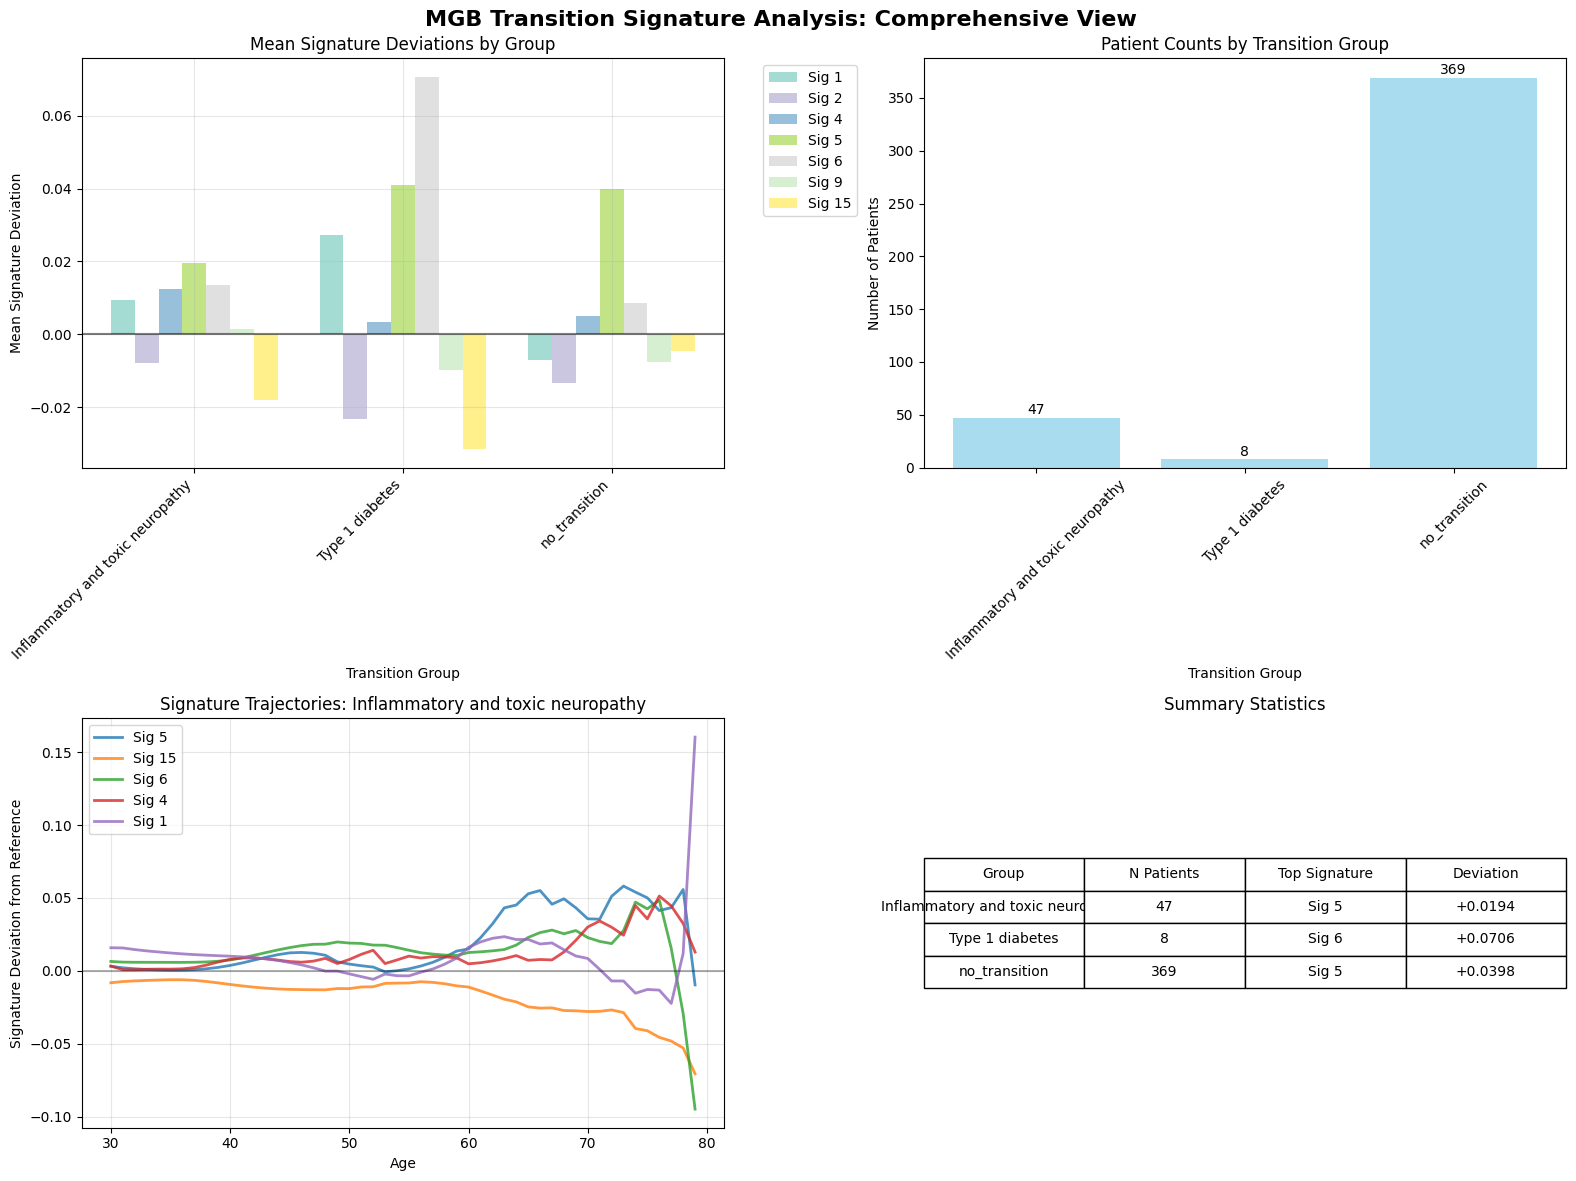

✅ MGB visualizations created successfully!


In [ ]:
# Create additional MGB-specific visualizations
print("=== CREATING MGB-SPECIFIC VISUALIZATIONS ===")

if 'mgb_results' in locals() and mgb_results is not None:
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Extract data for visualization
    signature_analysis = mgb_results['signature_analysis']
    group_signature_analysis = signature_analysis['group_signature_analysis']
    time_diff_by_cluster = signature_analysis['time_diff_by_cluster']
    group_names = signature_analysis['group_names']
    
    # Create a comprehensive comparison plot
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('MGB Transition Signature Analysis: Comprehensive View', fontsize=16, fontweight='bold')
    
    # 1. Top signatures by group (bar plot)
    ax1 = axes[0, 0]
    if group_names:
        # Get top 5 signatures across all groups
        all_signatures = set()
        for group_name, analysis in group_signature_analysis.items():
            for sig_info in analysis['top_signatures'][:5]:
                all_signatures.add(sig_info['signature_idx'])
        
        top_signatures = sorted(list(all_signatures))[:8]  # Top 8 signatures
        
        x_pos = np.arange(len(group_names))
        width = 0.8 / len(top_signatures)
        
        colors = plt.cm.Set3(np.linspace(0, 1, len(top_signatures)))
        
        for i, sig_idx in enumerate(top_signatures):
            sig_deviations = []
            for group_name in group_names:
                mean_dev = group_signature_analysis[group_name]['mean_deviations'][sig_idx]
                sig_deviations.append(mean_dev)
            
            ax1.bar(x_pos + i * width, sig_deviations, width, 
                   label=f'Sig {sig_idx}', alpha=0.8, color=colors[i])
        
        ax1.set_xlabel('Transition Group')
        ax1.set_ylabel('Mean Signature Deviation')
        ax1.set_title('Mean Signature Deviations by Group')
        ax1.set_xticks(x_pos + width * (len(top_signatures)-1) / 2)
        ax1.set_xticklabels(group_names, rotation=45, ha='right')
        ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(True, alpha=0.3)
    
    # 2. Patient counts by group
    ax2 = axes[0, 1]
    if group_names:
        patient_counts = [group_signature_analysis[group]['n_patients'] for group in group_names]
        bars = ax2.bar(group_names, patient_counts, alpha=0.7, color='skyblue')
        ax2.set_xlabel('Transition Group')
        ax2.set_ylabel('Number of Patients')
        ax2.set_title('Patient Counts by Transition Group')
        ax2.tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar, count in zip(bars, patient_counts):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    str(count), ha='center', va='bottom')
    
    # 3. Signature trajectory over time (for first group)
    ax3 = axes[1, 0]
    if group_names and len(time_diff_by_cluster) > 0:
        group_idx = signature_analysis['group_to_idx'][group_names[0]]
        group_deviations = time_diff_by_cluster[group_idx, :, :]  # Shape: (K, T)
        
        T = group_deviations.shape[1]
        time_points = np.arange(T) + 30  # Age 30 to 30+T
        
        # Plot top 5 signatures
        top_sig_indices = [sig_info['signature_idx'] for sig_info in group_signature_analysis[group_names[0]]['top_signatures'][:5]]
        
        for i, sig_idx in enumerate(top_sig_indices):
            ax3.plot(time_points, group_deviations[sig_idx, :], 
                    label=f'Sig {sig_idx}', linewidth=2, alpha=0.8)
        
        ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax3.set_xlabel('Age')
        ax3.set_ylabel('Signature Deviation from Reference')
        ax3.set_title(f'Signature Trajectories: {group_names[0]}')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    
    # 4. Summary statistics table
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    # Create summary table
    summary_data = []
    for group_name in group_names:
        analysis = group_signature_analysis[group_name]
        top_sig = analysis['top_signatures'][0]
        summary_data.append([
            group_name,
            analysis['n_patients'],
            f"Sig {top_sig['signature_idx']}",
            f"{top_sig['mean_deviation']:+.4f}"
        ])
    
    table = ax4.table(cellText=summary_data,
                     colLabels=['Group', 'N Patients', 'Top Signature', 'Deviation'],
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    ax4.set_title('Summary Statistics')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ MGB visualizations created successfully!")
else:
    print("❌ No MGB results available for visualization")


In [ ]:
# Generate comprehensive summary statistics and insights
print("=== MGB TRANSITION ANALYSIS: SUMMARY STATISTICS AND INSIGHTS ===")

if 'mgb_results' in locals() and mgb_results is not None:
    transition_data = mgb_results['transition_data']
    signature_analysis = mgb_results['signature_analysis']
    group_signature_analysis = signature_analysis['group_signature_analysis']
    
    print(f"\n📊 DATASET OVERVIEW:")
    print(f"  Total patients in MGB: {Y_mgb.shape[0]:,}")
    print(f"  Total diseases: {len(disease_names_mgb)}")
    print(f"  Total signatures: {thetas_mgb.shape[1]}")
    print(f"  Time points: {thetas_mgb.shape[2]} (ages 30-{30+thetas_mgb.shape[2]-1})")
    
    print(f"\n🎯 TARGET DISEASE ANALYSIS:")
    print(f"  Target disease: {transition_data['target_disease']}")
    print(f"  Disease index: {transition_data['target_idx']}")
    
    # Count patients with target disease
    target_idx = transition_data['target_idx']
    patients_with_target = np.sum(Y_mgb[:, target_idx, :]) > 0
    print(f"  Patients with target disease: {np.sum(patients_with_target):,}")
    
    print(f"\n🔄 TRANSITION GROUPS:")
    total_transition_patients = 0
    for group_name, patients in transition_data['transition_groups'].items():
        n_patients = len(patients)
        total_transition_patients += n_patients
        print(f"  {group_name}: {n_patients:,} patients")
        
        if n_patients > 0 and group_name != 'no_transition':
            # Show age statistics for transition patients
            ages_at_target = [p['age_at_target'] for p in patients]
            ages_at_transition = [p['age_at_transition'] for p in patients if p['age_at_transition'] is not None]
            
            print(f"    Age at target disease: {np.mean(ages_at_target):.1f} ± {np.std(ages_at_target):.1f} years")
            if ages_at_transition:
                print(f"    Age at transition disease: {np.mean(ages_at_transition):.1f} ± {np.std(ages_at_transition):.1f} years")
                print(f"    Time between transition and target: {np.mean([t['age_at_target'] - t['age_at_transition'] for t in patients if t['age_at_transition'] is not None]):.1f} years")
    
    print(f"\n📈 SIGNATURE PATTERN ANALYSIS:")
    print(f"  Total transition groups analyzed: {len(group_signature_analysis)}")
    
    # Find most distinctive signatures across groups
    all_signature_deviations = {}
    for group_name, analysis in group_signature_analysis.items():
        for sig_info in analysis['top_signatures']:
            sig_idx = sig_info['signature_idx']
            deviation = sig_info['mean_deviation']
            
            if sig_idx not in all_signature_deviations:
                all_signature_deviations[sig_idx] = []
            all_signature_deviations[sig_idx].append((group_name, deviation))
    
    # Calculate signature distinctiveness (variance across groups)
    signature_distinctiveness = {}
    for sig_idx, group_deviations in all_signature_deviations.items():
        deviations = [dev for _, dev in group_deviations]
        distinctiveness = np.var(deviations) if len(deviations) > 1 else 0
        signature_distinctiveness[sig_idx] = distinctiveness
    
    # Top most distinctive signatures
    top_distinctive = sorted(signature_distinctiveness.items(), key=lambda x: x[1], reverse=True)[:5]
    
    print(f"\n🔍 MOST DISTINCTIVE SIGNATURES ACROSS GROUPS:")
    for sig_idx, distinctiveness in top_distinctive:
        print(f"  Signature {sig_idx}: distinctiveness = {distinctiveness:.6f}")
        
        # Show which groups have this signature elevated
        group_deviations = all_signature_deviations[sig_idx]
        elevated_groups = [group for group, dev in group_deviations if dev > 0.01]
        suppressed_groups = [group for group, dev in group_deviations if dev < -0.01]
        
        if elevated_groups:
            print(f"    Elevated in: {', '.join(elevated_groups)}")
        if suppressed_groups:
            print(f"    Suppressed in: {', '.join(suppressed_groups)}")
    
    print(f"\n💡 KEY INSIGHTS:")
    
    # Insight 1: Transition prevalence
    transition_rate = total_transition_patients / np.sum(patients_with_target) if np.sum(patients_with_target) > 0 else 0
    print(f"  1. Transition rate: {transition_rate:.1%} of patients with target disease had transition diseases")
    
    # Insight 2: Most common transition pathway
    if transition_data['transition_groups']:
        most_common_transition = max(transition_data['transition_groups'].items(), 
                                   key=lambda x: len(x[1]) if x[0] != 'no_transition' else 0)
        if most_common_transition[0] != 'no_transition':
            print(f"  2. Most common transition pathway: {most_common_transition[0]} → {transition_data['target_disease']}")
            print(f"     ({len(most_common_transition[1])} patients)")
    
    # Insight 3: Signature patterns
    if top_distinctive:
        most_distinctive_sig = top_distinctive[0][0]
        print(f"  3. Most distinctive signature: Signature {most_distinctive_sig}")
        print(f"     This signature shows the largest differences between transition groups")
    
    # Insight 4: Age patterns
    if transition_data['transition_groups']:
        all_transition_ages = []
        for group_name, patients in transition_data['transition_groups'].items():
            if group_name != 'no_transition':
                ages = [p['age_at_target'] for p in patients]
                all_transition_ages.extend(ages)
        
        if all_transition_ages:
            print(f"  4. Age distribution of transition patients:")
            print(f"     Mean age at target disease: {np.mean(all_transition_ages):.1f} years")
            print(f"     Age range: {np.min(all_transition_ages):.0f} - {np.max(all_transition_ages):.0f} years")
    
    print(f"\n✅ MGB transition analysis completed successfully!")
    print(f"   This analysis reveals how different disease pathways lead to the same target disease")
    print(f"   through distinct biological signatures in the MGB dataset.")
    
else:
    print("❌ No MGB results available for summary")


=== MGB TRANSITION ANALYSIS: SUMMARY STATISTICS AND INSIGHTS ===

📊 DATASET OVERVIEW:
  Total patients in MGB: 34,592
  Total diseases: 346
  Total signatures: 21
  Time points: 51 (ages 30-80)

🎯 TARGET DISEASE ANALYSIS:
  Target disease: Rheumatic disease of the heart valves
  Disease index: 105
  Patients with target disease: 1

🔄 TRANSITION GROUPS:
  Inflammatory and toxic neuropathy: 47 patients
    Age at target disease: 70.4 ± 7.7 years
    Age at transition disease: 66.5 ± 8.6 years
    Time between transition and target: 3.9 years
  Type 1 diabetes: 8 patients
    Age at target disease: 68.1 ± 10.0 years
    Age at transition disease: 62.8 ± 9.9 years
    Time between transition and target: 5.4 years
  no_transition: 369 patients

📈 SIGNATURE PATTERN ANALYSIS:
  Total transition groups analyzed: 3

🔍 MOST DISTINCTIVE SIGNATURES ACROSS GROUPS:
  Signature 6: distinctiveness = 0.000793
    Elevated in: Inflammatory and toxic neuropathy, Type 1 diabetes
  Signature 1: distinctive

=== MGB PATHWAY DISCOVERY ANALYSIS ===
Running pathway discovery for: Rheumatic disease of the heart valves
COMPLETE PATHWAY ANALYSIS: RHEUMATIC DISEASE OF THE HEART VALVES

1. LOADING FULL DATASET
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000

2. DISCOVERING PATHWAYS TO RHEUMATIC DISEASE OF THE HEART VALVES
=== COMPARING CLUSTERING METHODS FOR RHEUMATIC DISEASE OF THE HEART VALVES ===

1. Clustering by Average Signature Loading:
=== DISCOVERING PATHWAYS TO RHEUMATIC DISEASE OF THE HEART VALVES ===
Method: average_loading
Found target disease: Rheumatic disease of the heart valves (index 105)
Found 4595 patients who developed Rheumatic disease of the heart valves

Creating trajectory features for pathway discovery...
Method: average_loading
Created 21 features per patient (averag

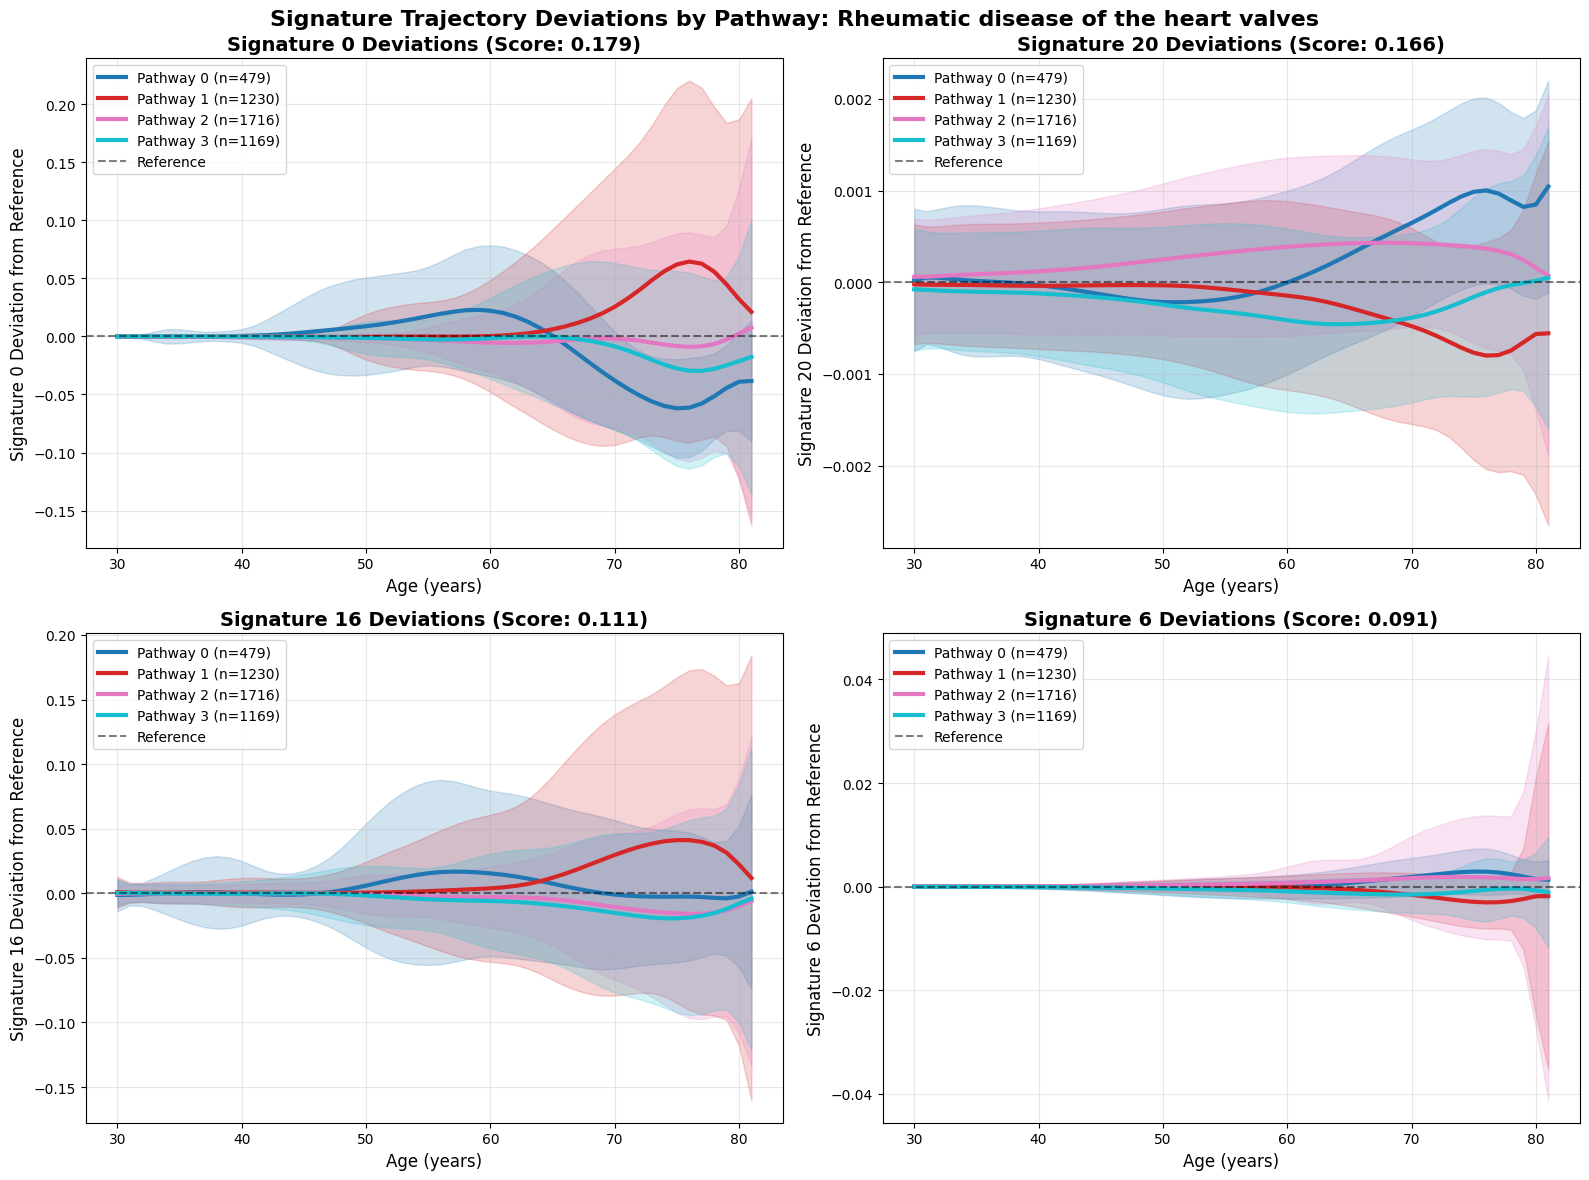

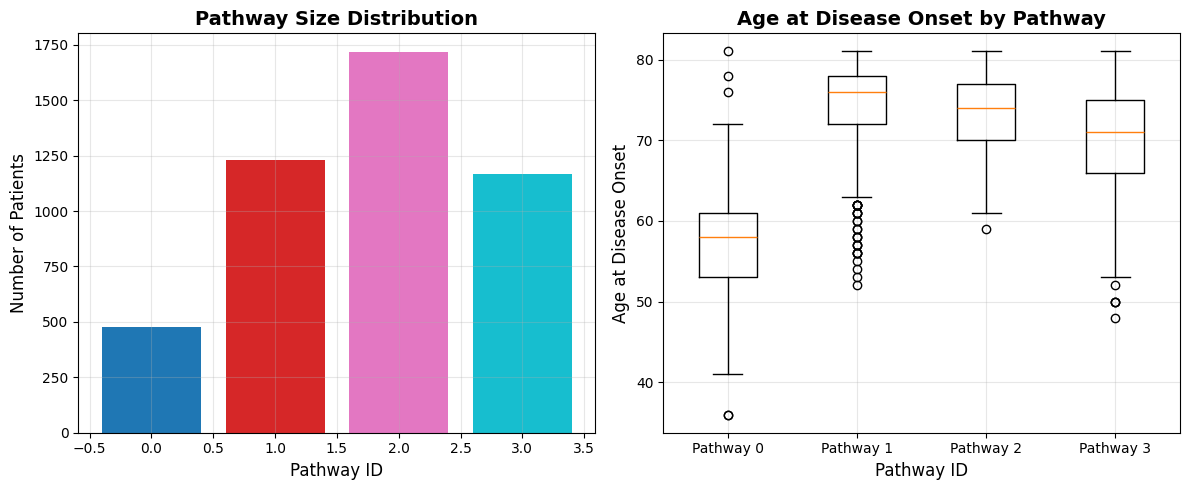


6. CREATING STACKED SIGNATURE DEVIATION PLOTS:


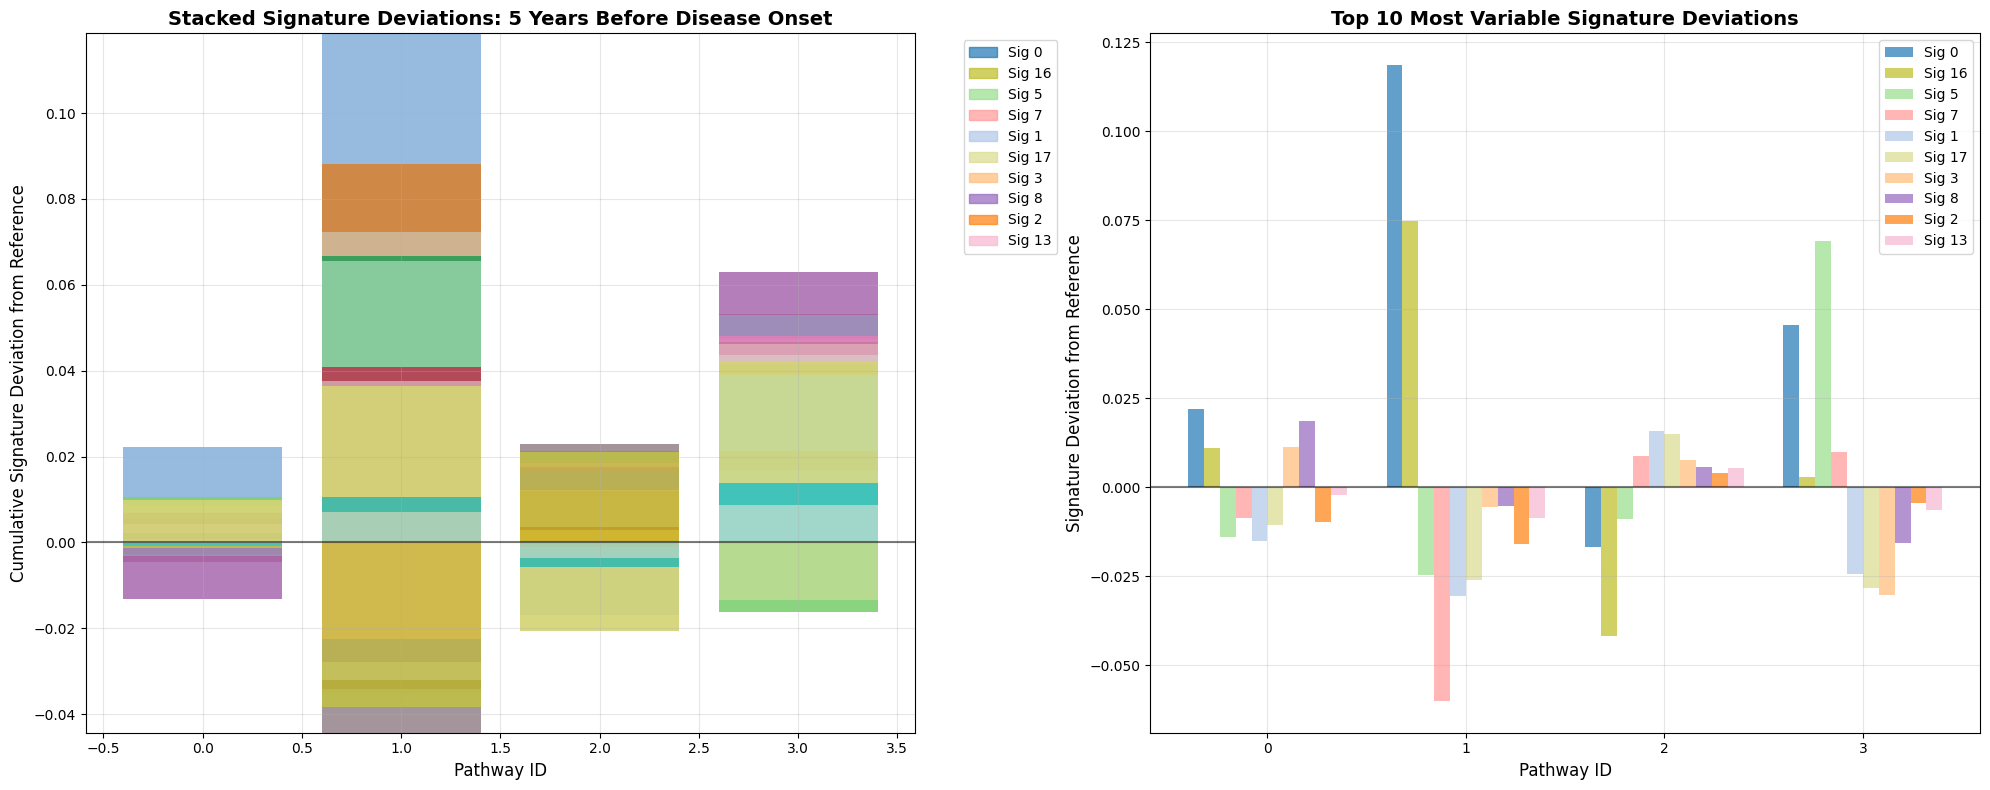


Summary of signature deviations (5 years before disease):
  Pathway 0: Total absolute deviation = 0.136
    Top 3 signatures: [(0, 0.022112978069006226), (8, 0.018672154620922622), (1, -0.015100993380150737)]
  Pathway 1: Total absolute deviation = 0.409
    Top 3 signatures: [(0, 0.11855318565024266), (16, 0.07480738834846765), (7, -0.059999110060472025)]
  Pathway 2: Total absolute deviation = 0.152
    Top 3 signatures: [(16, -0.041632438984194345), (0, -0.01682747246902036), (1, 0.01569211339728635)]
  Pathway 3: Total absolute deviation = 0.268
    Top 3 signatures: [(5, 0.06910842802606333), (0, 0.04565150810146203), (3, -0.030174232389522326)]

2. TRAJECTORY SIMILARITY METHOD:
=== INTERROGATING PATHWAYS TO RHEUMATIC DISEASE OF THE HEART VALVES ===

1. PATHWAY STATISTICS:
   Pathway 0: 2420 patients (52.7%)
   Pathway 1: 894 patients (19.5%)
   Pathway 2: 642 patients (14.0%)
   Pathway 3: 638 patients (13.9%)

2. CALCULATING SIGNATURE TRAJECTORIES:
   Pathway 0: 2420 patients
 

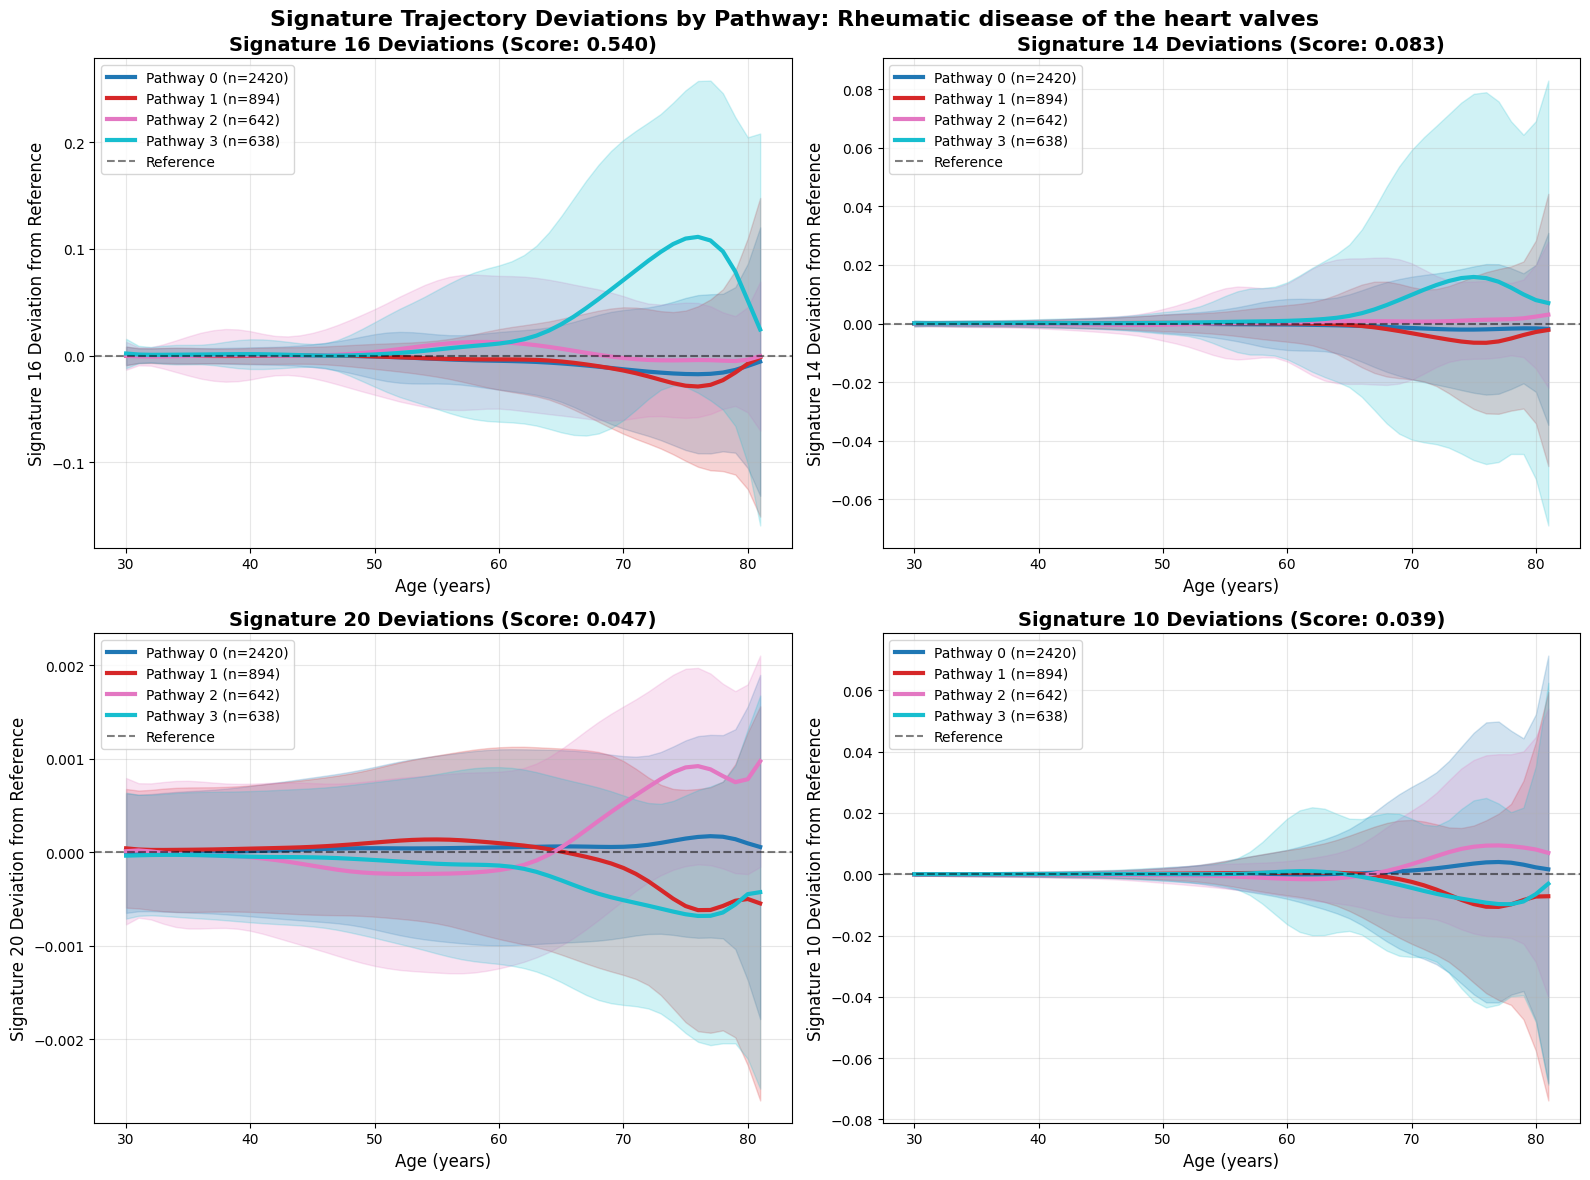

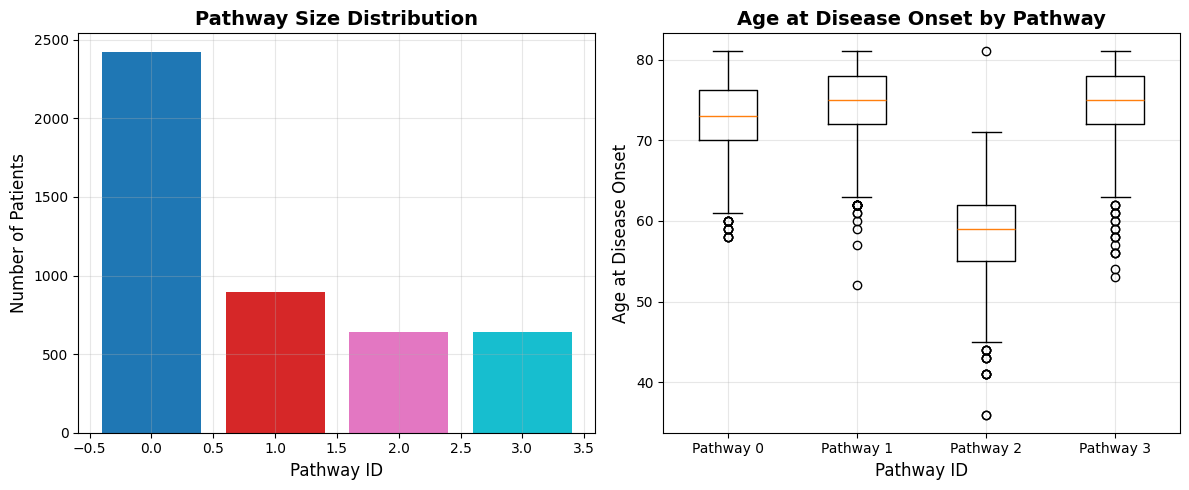


6. CREATING STACKED SIGNATURE DEVIATION PLOTS:


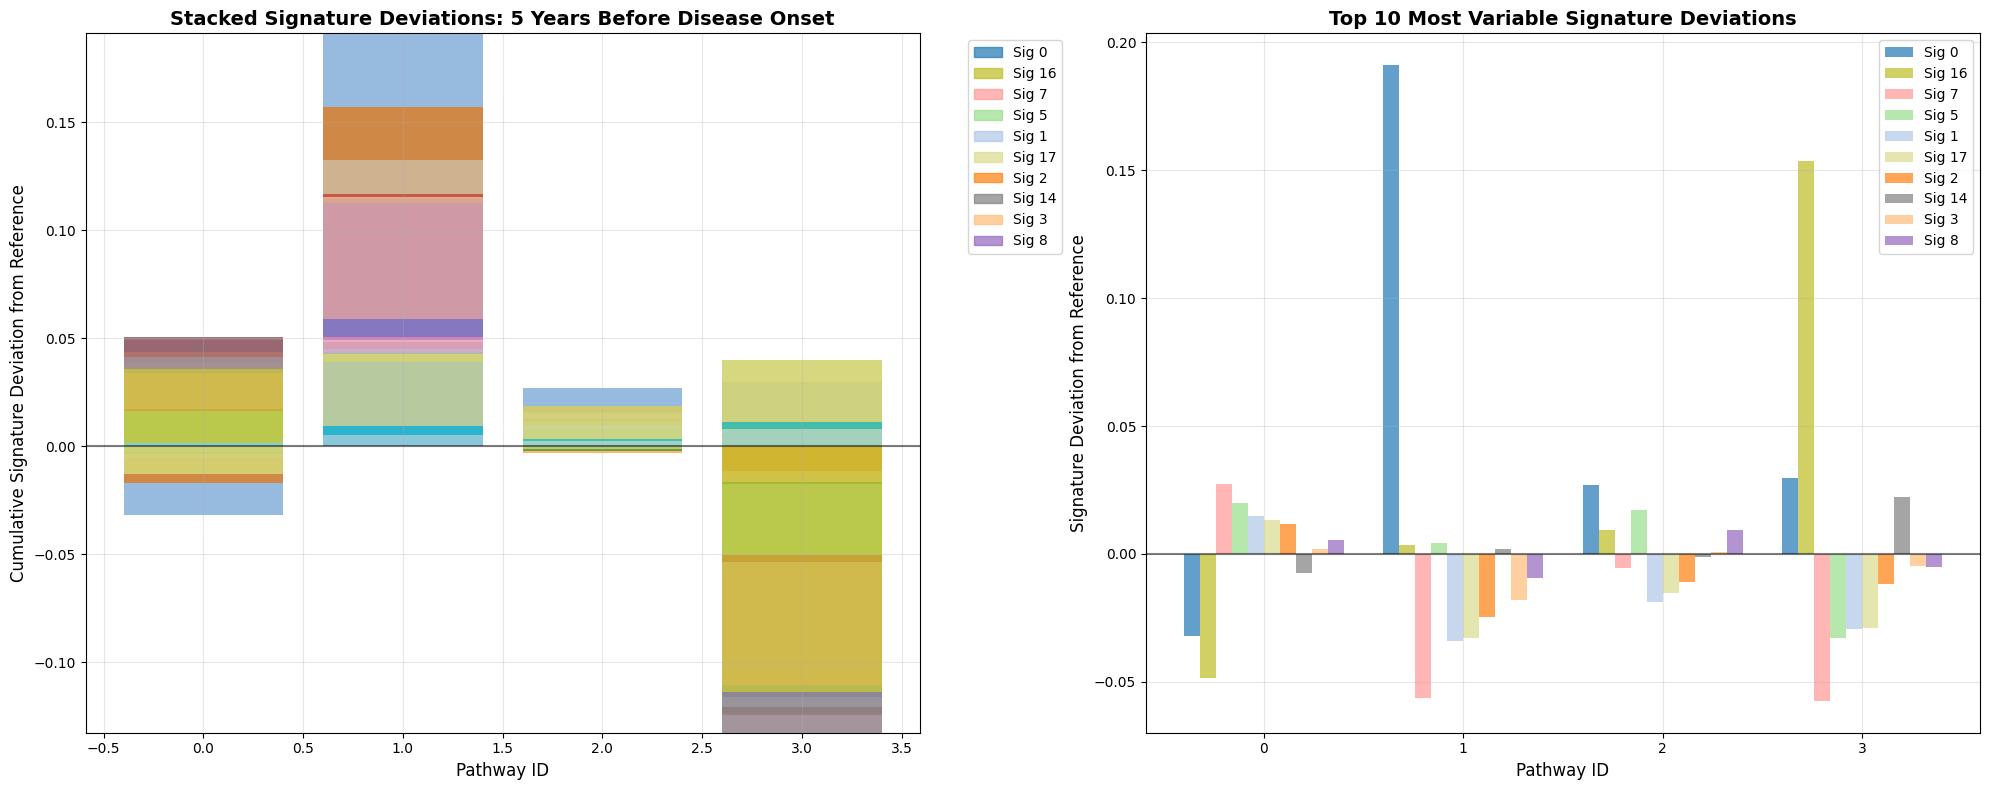


Summary of signature deviations (5 years before disease):
  Pathway 0: Total absolute deviation = 0.206
    Top 3 signatures: [(16, -0.04861297705322941), (0, -0.031935390356102517), (7, 0.02750570573086425)]
  Pathway 1: Total absolute deviation = 0.413
    Top 3 signatures: [(0, 0.19109672272768952), (7, -0.05647693648538231), (1, -0.03389209950642373)]
  Pathway 2: Total absolute deviation = 0.129
    Top 3 signatures: [(0, 0.026957594890380118), (1, -0.018774401327079582), (5, 0.017283784490764134)]
  Pathway 3: Total absolute deviation = 0.413
    Top 3 signatures: [(16, 0.15361407381558534), (7, -0.0574933411069177), (5, -0.03306132716665017)]

3. PATHWAY SIZE COMPARISON:
Average Loading Method:
  Pathway 0: 479 patients
  Pathway 1: 1230 patients
  Pathway 2: 1716 patients
  Pathway 3: 1169 patients
Trajectory Similarity Method:
  Pathway 0: 2420 patients
  Pathway 1: 894 patients
  Pathway 2: 642 patients
  Pathway 3: 638 patients

3c. DEVIATION FROM REFERENCE METHOD:
=== INTE

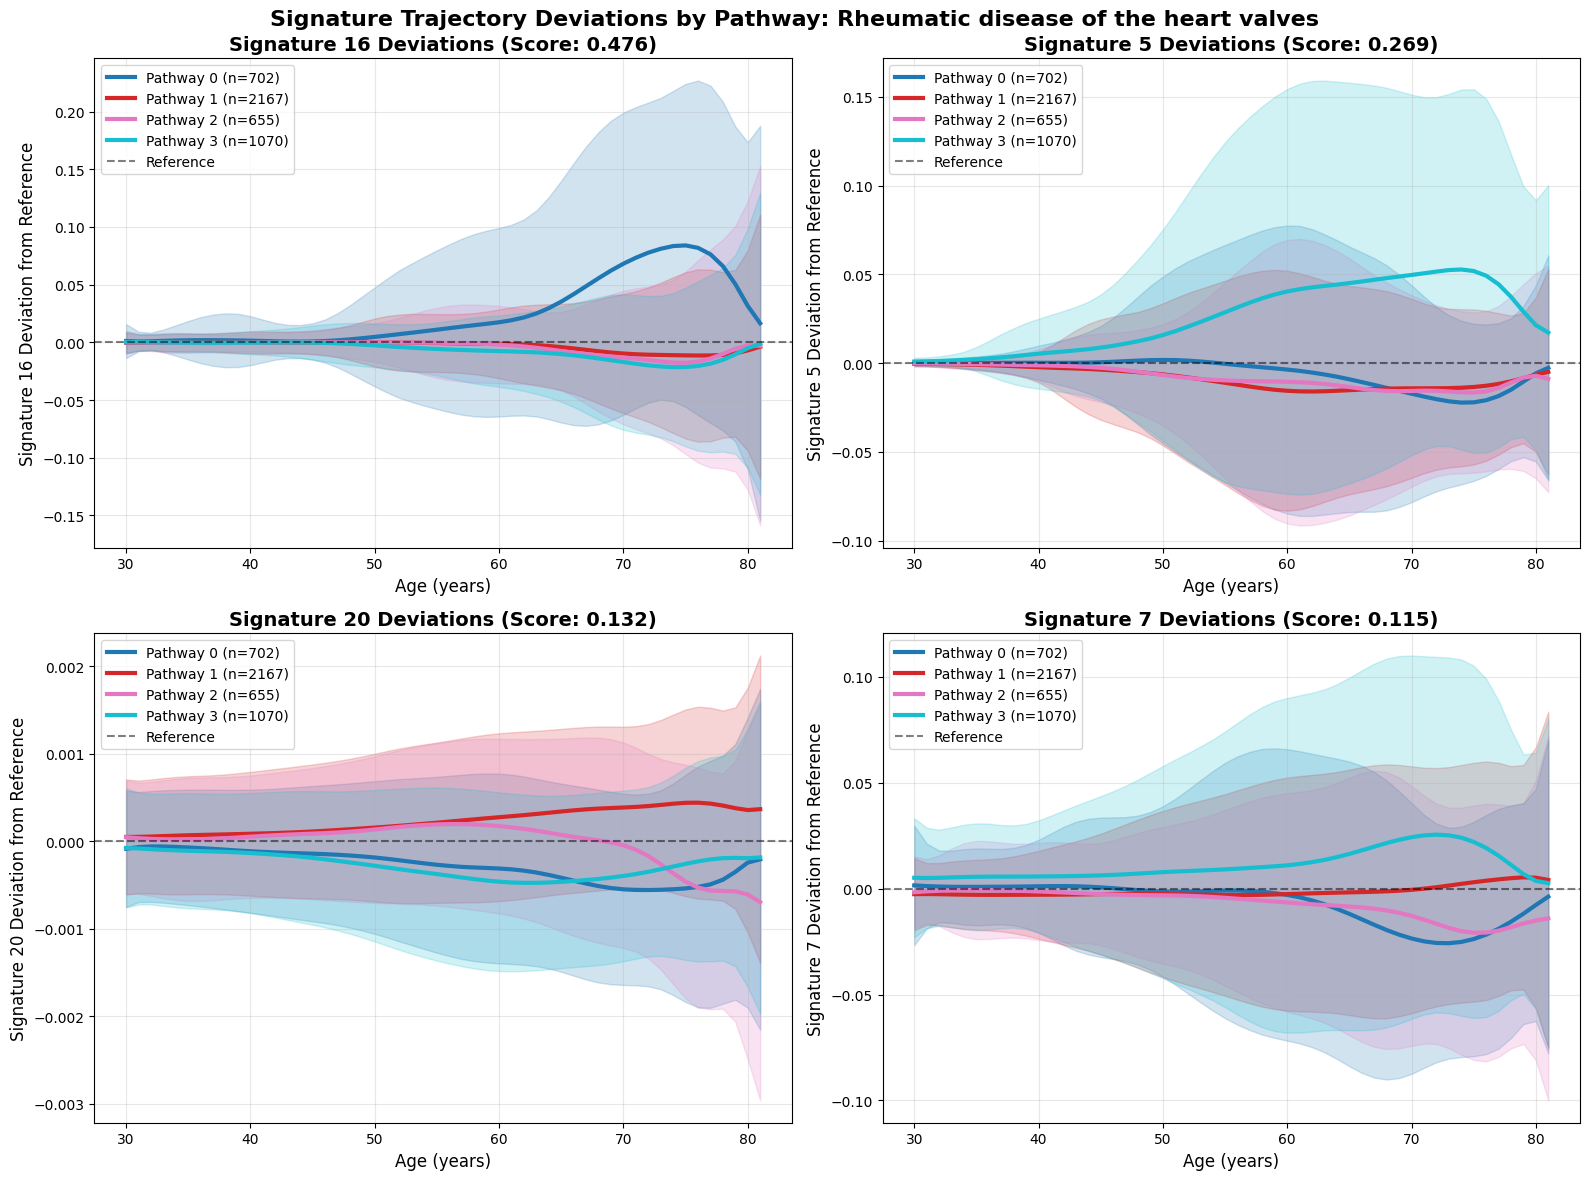

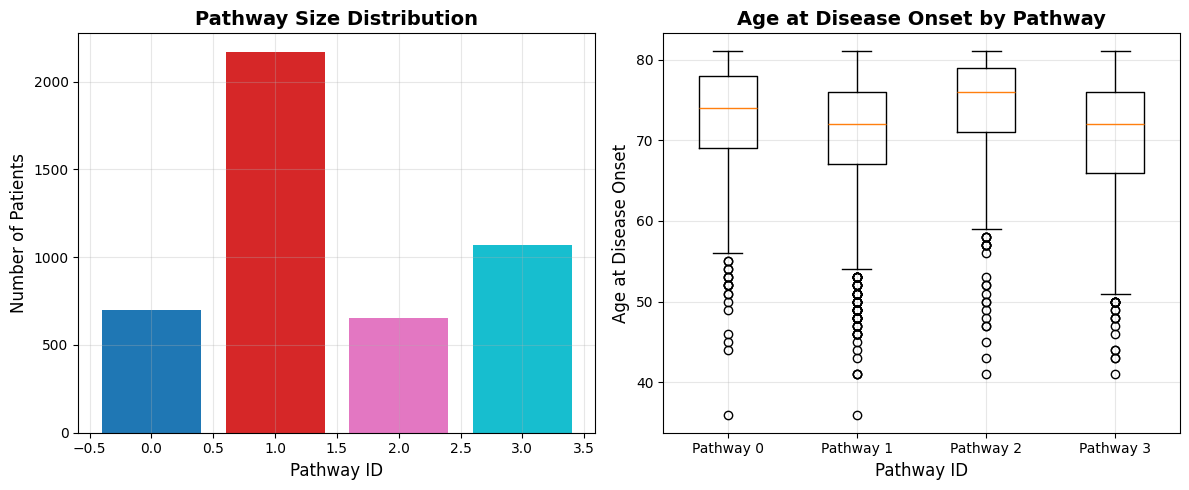


6. CREATING STACKED SIGNATURE DEVIATION PLOTS:


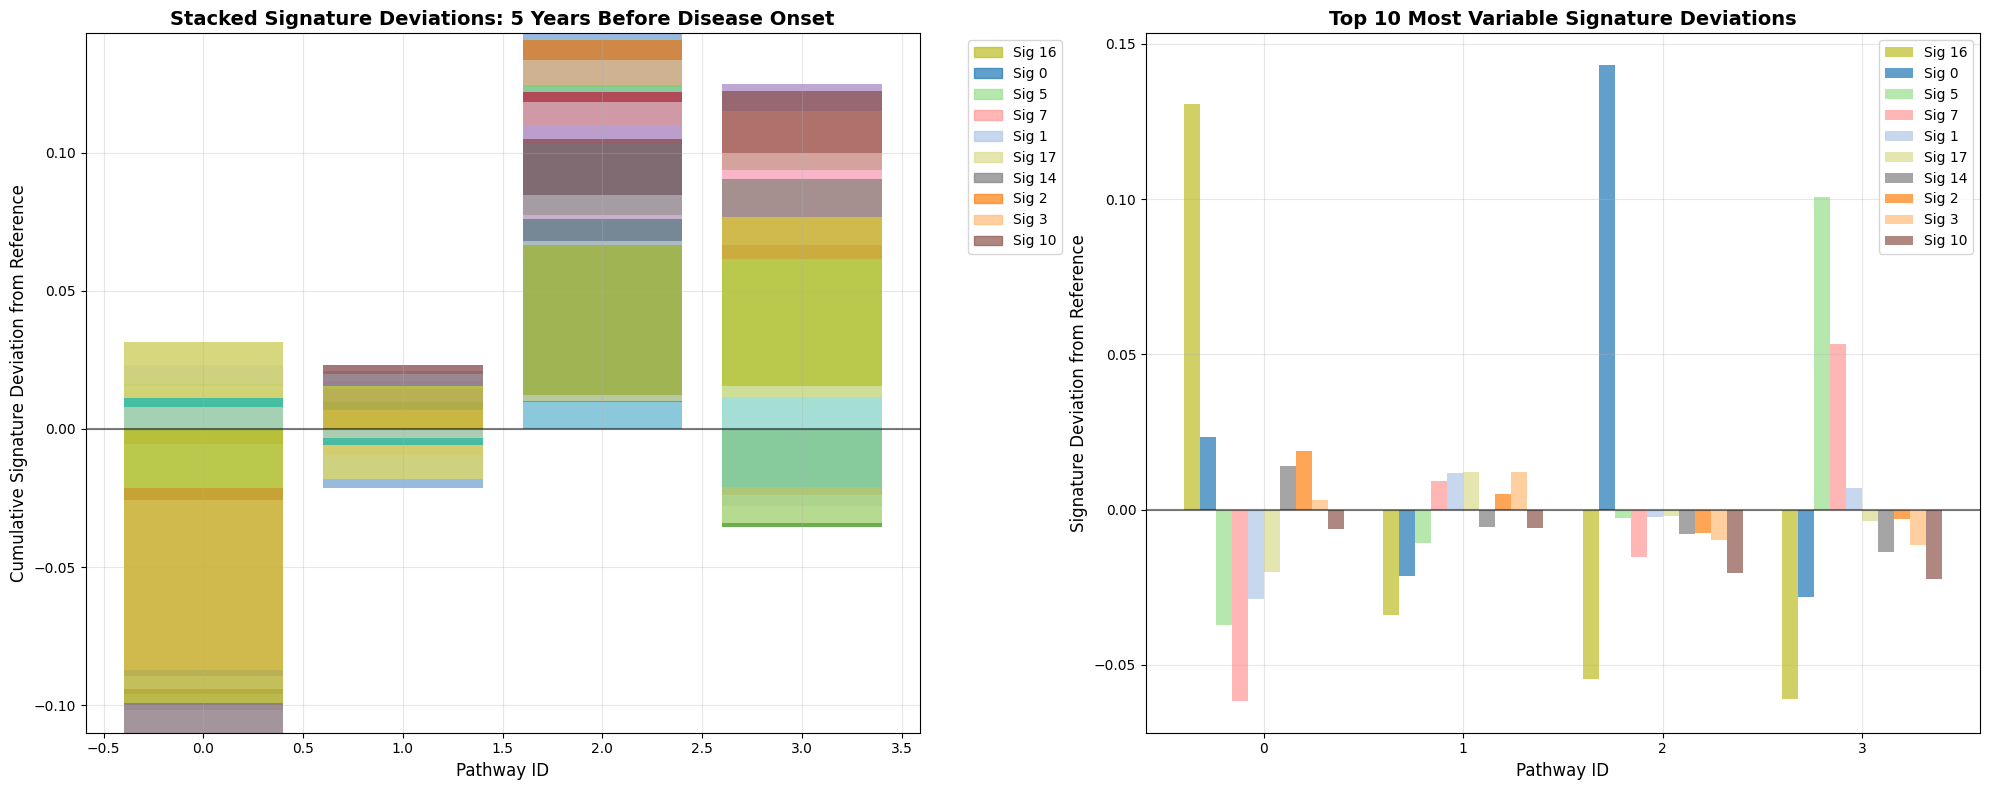


Summary of signature deviations (5 years before disease):
  Pathway 0: Total absolute deviation = 0.379
    Top 3 signatures: [(16, 0.13049649392930887), (7, -0.06160930685050478), (5, -0.037082823071809434)]
  Pathway 1: Total absolute deviation = 0.160
    Top 3 signatures: [(16, -0.03382309213095486), (0, -0.02149787176689598), (8, 0.01411368232338294)]
  Pathway 2: Total absolute deviation = 0.301
    Top 3 signatures: [(0, 0.14313570983768273), (16, -0.054394683843534256), (10, -0.020322953689813808)]
  Pathway 3: Total absolute deviation = 0.344
    Top 3 signatures: [(5, 0.10064005489687879), (16, -0.061053299058629856), (7, 0.05340912354546479)]

4. INTEGRATING MEDICATIONS WITH PATHWAYS

4a. Average Loading Method:
=== INTEGRATING LONG-TERM MEDICATIONS WITH SIGNATURE PATHWAYS ===
Loading medication data from /Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/gp_scripts.txt...
✅ Loaded 56,212,343 prescription records
   From 222,044 unique patients
   Covering 20,937 uniqu

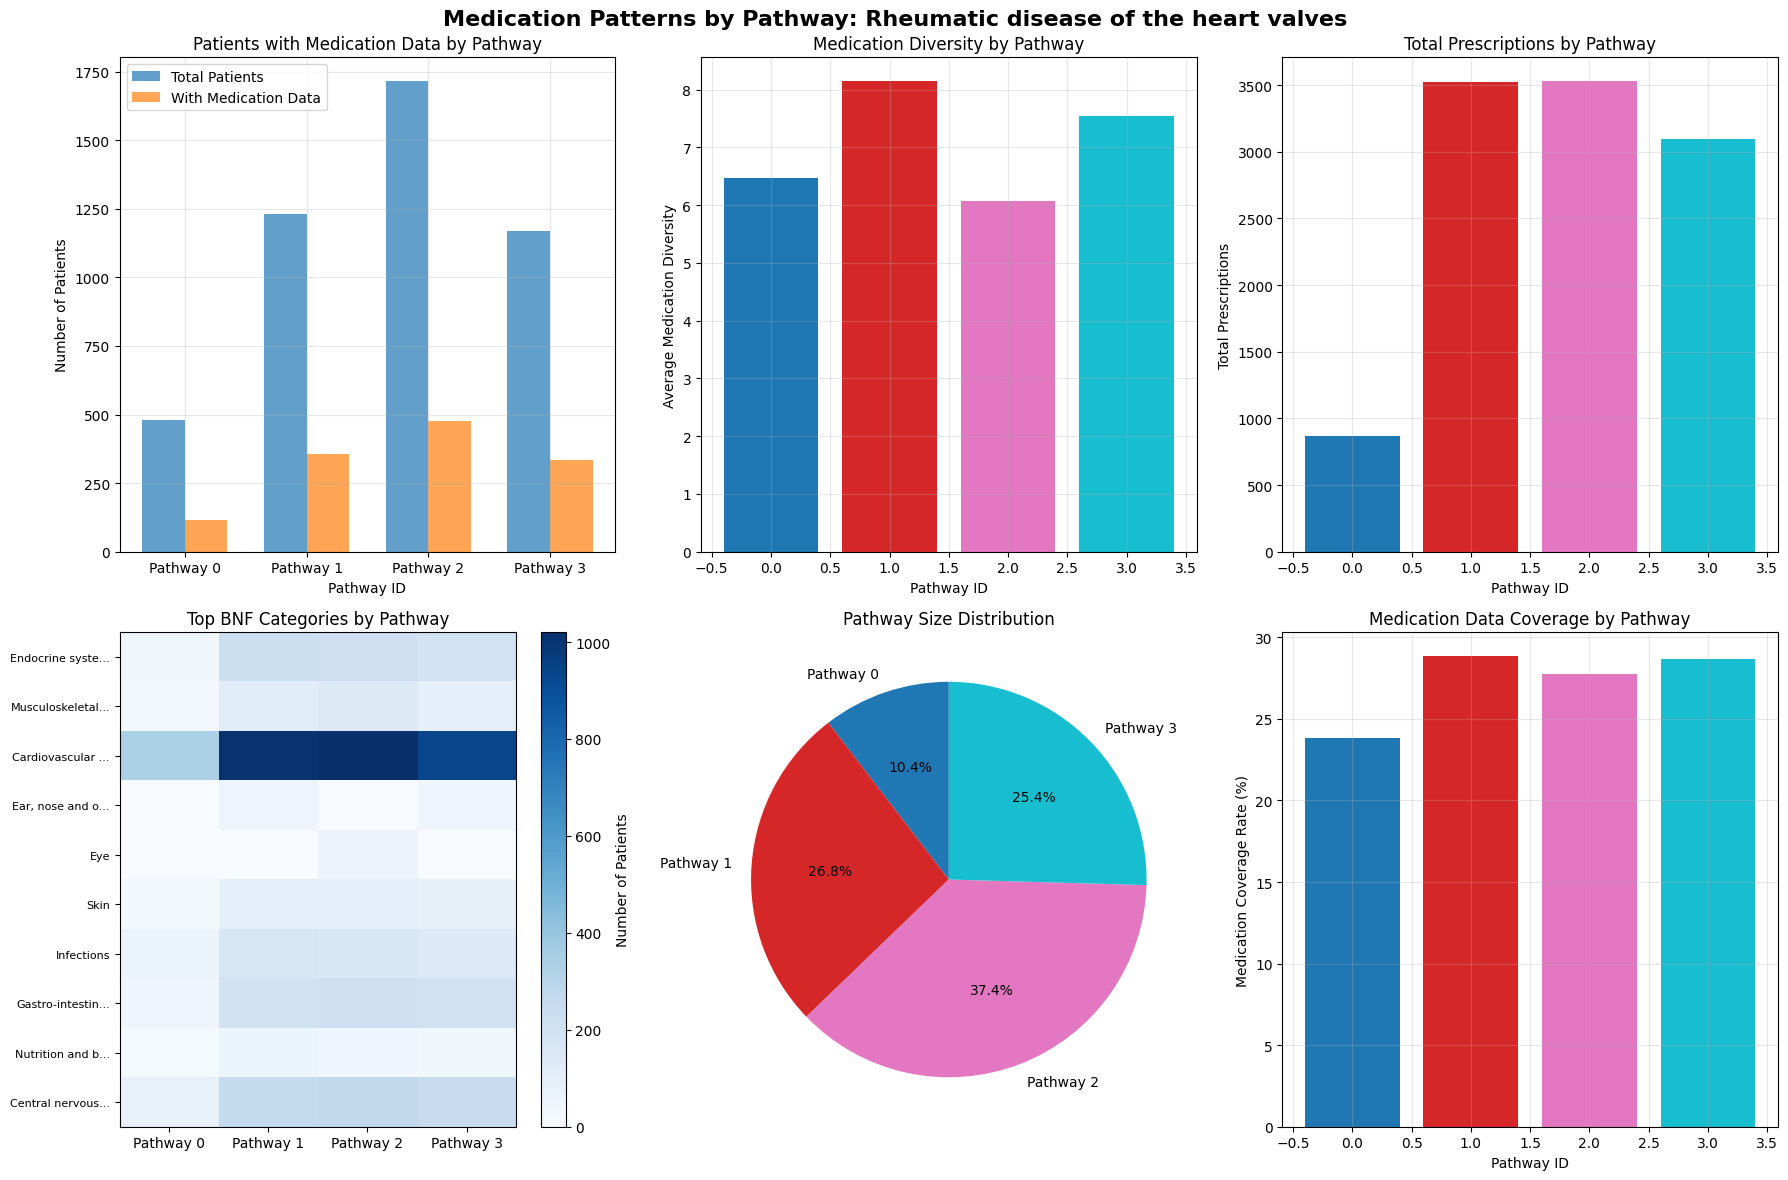


=== MEDICATION INTEGRATION SUMMARY ===
Target Disease: Rheumatic disease of the heart valves
Total Pathways: 4
Total Patients: 4594
Patients with Medication Data: 1280

Pathway 0:
  Patients: 479
  With meds: 114
  Coverage: 23.8%
  Medication diversity: 6.47
  Total prescriptions: 868

Pathway 1:
  Patients: 1230
  With meds: 355
  Coverage: 28.9%
  Medication diversity: 8.15
  Total prescriptions: 3520

Pathway 2:
  Patients: 1716
  With meds: 476
  Coverage: 27.7%
  Medication diversity: 6.08
  Total prescriptions: 3531

Pathway 3:
  Patients: 1169
  With meds: 335
  Coverage: 28.7%
  Medication diversity: 7.55
  Total prescriptions: 3098

4b. Trajectory Similarity Method:
=== INTEGRATING LONG-TERM MEDICATIONS WITH SIGNATURE PATHWAYS ===
Loading medication data from /Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/gp_scripts.txt...
✅ Loaded 56,212,343 prescription records
   From 222,044 unique patients
   Covering 20,937 unique medications
Analyzing long-term medication pat

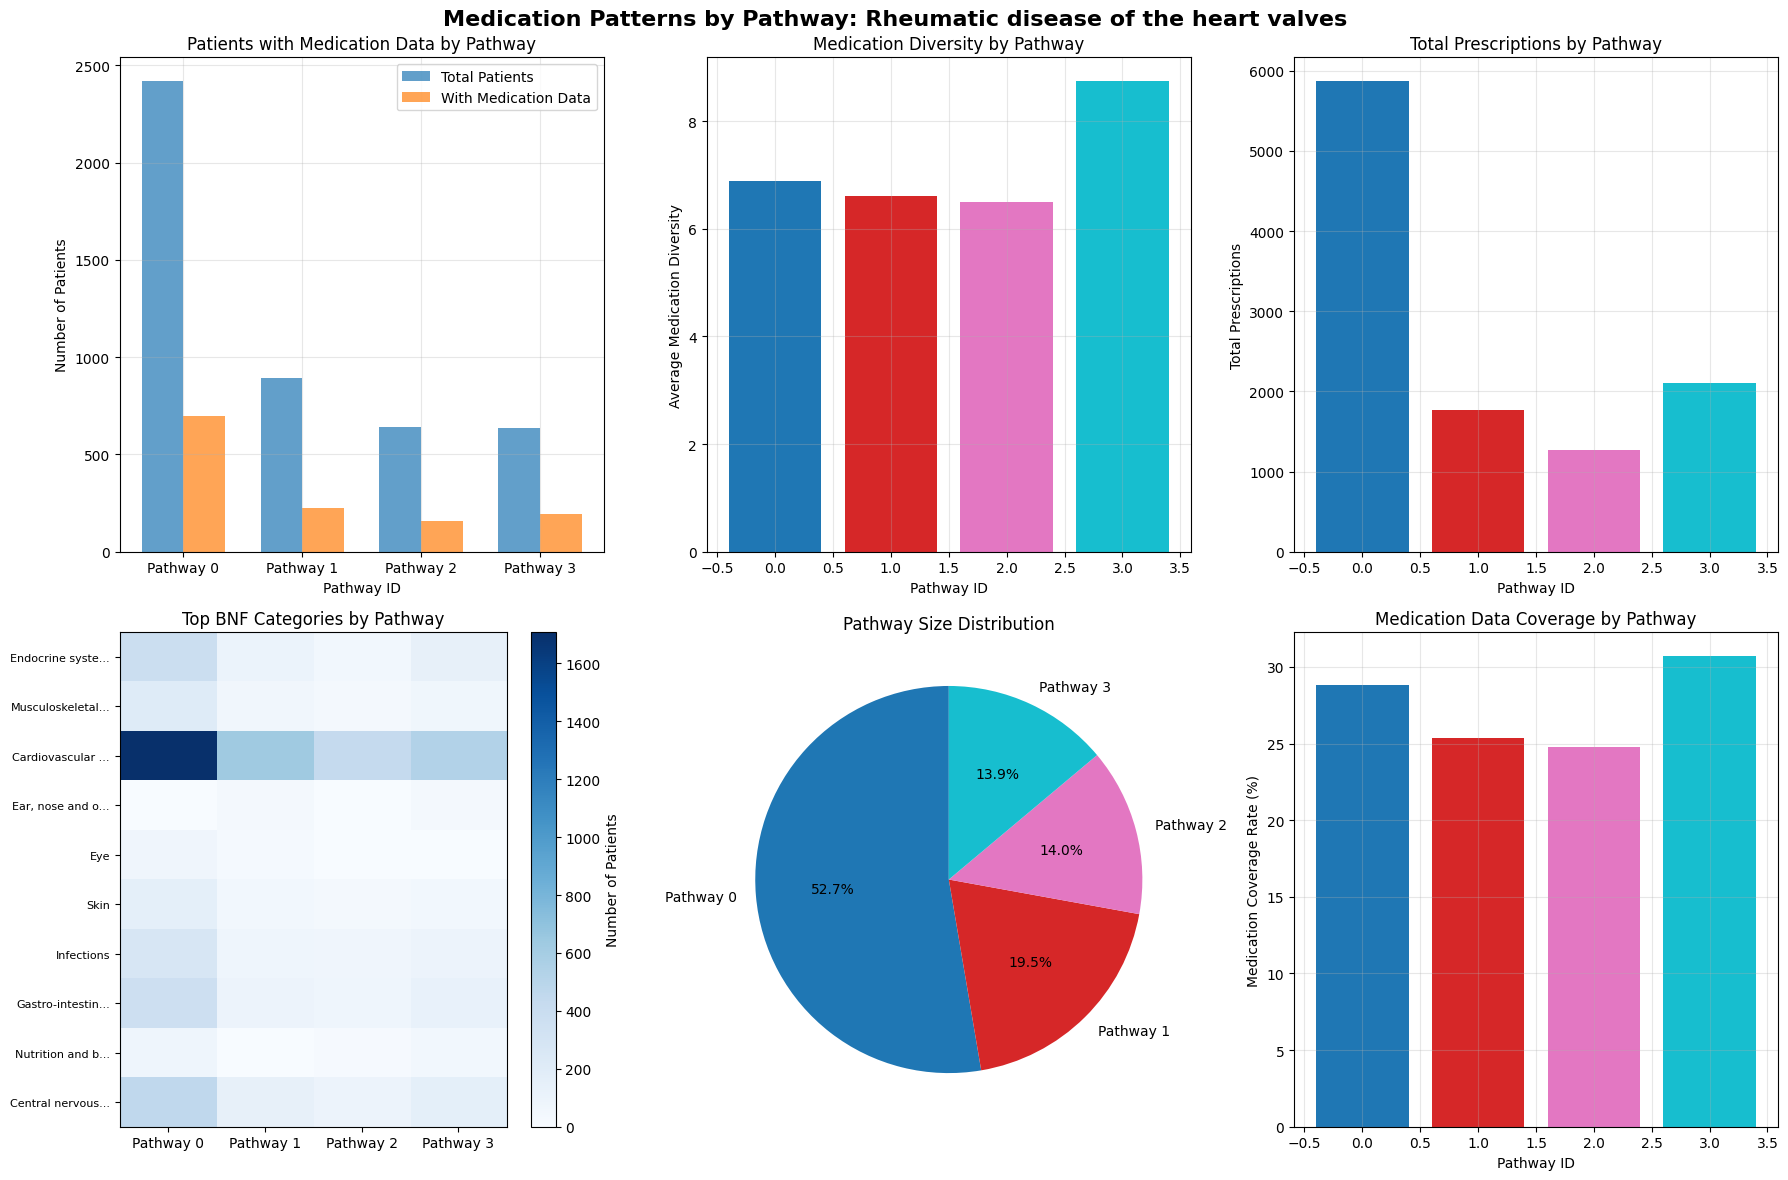


=== MEDICATION INTEGRATION SUMMARY ===
Target Disease: Rheumatic disease of the heart valves
Total Pathways: 4
Total Patients: 4594
Patients with Medication Data: 1280

Pathway 0:
  Patients: 2420
  With meds: 698
  Coverage: 28.8%
  Medication diversity: 6.89
  Total prescriptions: 5873

Pathway 1:
  Patients: 894
  With meds: 227
  Coverage: 25.4%
  Medication diversity: 6.62
  Total prescriptions: 1763

Pathway 2:
  Patients: 642
  With meds: 159
  Coverage: 24.8%
  Medication diversity: 6.50
  Total prescriptions: 1272

Pathway 3:
  Patients: 638
  With meds: 196
  Coverage: 30.7%
  Medication diversity: 8.75
  Total prescriptions: 2109

4c. Deviation from Reference Method:
=== INTEGRATING LONG-TERM MEDICATIONS WITH SIGNATURE PATHWAYS ===
Loading medication data from /Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/gp_scripts.txt...
✅ Loaded 56,212,343 prescription records
   From 222,044 unique patients
   Covering 20,937 unique medications
Analyzing long-term medication p

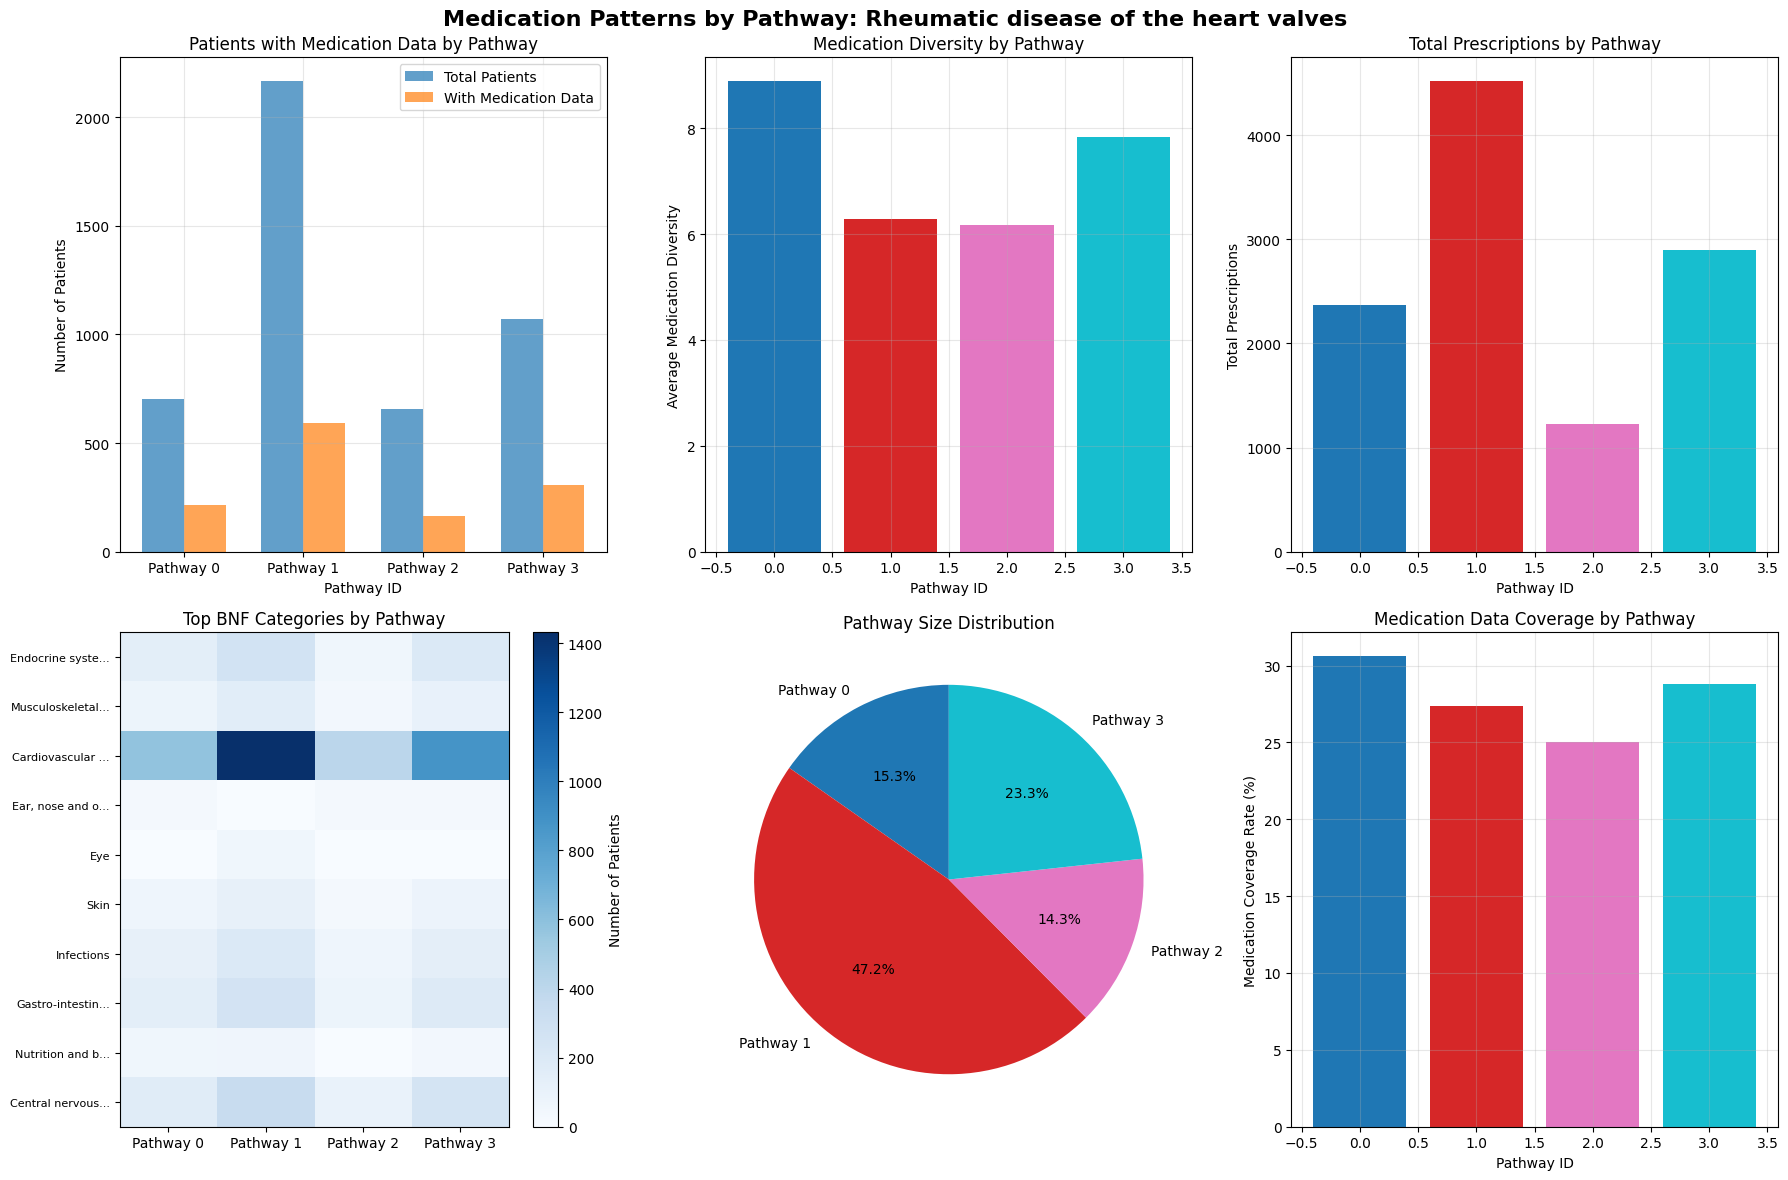


=== MEDICATION INTEGRATION SUMMARY ===
Target Disease: Rheumatic disease of the heart valves
Total Pathways: 4
Total Patients: 4594
Patients with Medication Data: 1280

Pathway 0:
  Patients: 702
  With meds: 215
  Coverage: 30.6%
  Medication diversity: 8.89
  Total prescriptions: 2366

Pathway 1:
  Patients: 2167
  With meds: 593
  Coverage: 27.4%
  Medication diversity: 6.27
  Total prescriptions: 4520

Pathway 2:
  Patients: 655
  With meds: 164
  Coverage: 25.0%
  Medication diversity: 6.17
  Total prescriptions: 1230

Pathway 3:
  Patients: 1070
  With meds: 308
  Coverage: 28.8%
  Medication diversity: 7.83
  Total prescriptions: 2901

5. ANALYZING PRS DIFFERENCES BY PATHWAY

5a. Average Loading Method:

=== ANALYZING POLYGENIC RISK SCORES BY PATHWAY ===
❌ PRS file not found. Please specify the path to your PRS scores file.
Expected format: CSV with columns 'eid' and various PRS scores

5b. Trajectory Similarity Method:

=== ANALYZING POLYGENIC RISK SCORES BY PATHWAY ===
❌ PRS 

KeyError: 'pathways'

In [ ]:
# PATHWAY DISCOVERY ANALYSIS FOR MGB
# This discovers different pathways patients take to reach the same disease outcome

print("=== MGB PATHWAY DISCOVERY ANALYSIS ===")

# Import pathway discovery functions
from run_pathway_analysis import run_complete_pathway_analysis

# Run pathway discovery for MGB
# We'll use the target disease we found earlier
if 'target_disease_name' in locals():
    print(f"Running pathway discovery for: {target_disease_name}")
    
    # Run the complete pathway analysis
    mgb_pathway_results = run_complete_pathway_analysis(target_disease_name, n_pathways=4)
    
    if mgb_pathway_results is not None:
        print("✅ MGB pathway discovery completed successfully!")
        
        # Extract results
        pathway_data_avg = mgb_pathway_results['pathway_data_avg']
        pathway_data_traj = mgb_pathway_results['pathway_data_traj'] 
        pathway_data_dev = mgb_pathway_results['pathway_data_dev']
        
        print(f"\nPathway discovery methods:")
        print(f"  1. Average loading method: {len(pathway_data_avg['pathways'])} pathways")
        print(f"  2. Trajectory similarity method: {len(pathway_data_traj['pathways'])} pathways")
        print(f"  3. Deviation from reference method: {len(pathway_data_dev['pathways'])} pathways")
        
        # Show pathway sizes for each method
        for method_name, pathway_data in [("Average Loading", pathway_data_avg), 
                                        ("Trajectory Similarity", pathway_data_traj),
                                        ("Deviation from Reference", pathway_data_dev)]:
            print(f"\n{method_name} pathways:")
            for i, pathway in enumerate(pathway_data['pathways']):
                n_patients = len(pathway['patient_indices'])
                percentage = (n_patients / pathway_data['total_patients']) * 100
                print(f"  Pathway {i}: {n_patients:,} patients ({percentage:.1f}%)")
    else:
        print("❌ MGB pathway discovery failed")
else:
    print("❌ No target disease found for pathway discovery")


In [ ]:
# SPECIFIC BIOLOGICAL PATHWAY COMPARISON FOR MGB
# This compares specific disease transition pathways with biological interpretation

print("=== MGB SPECIFIC BIOLOGICAL PATHWAY COMPARISON ===")

# Import specific pathway comparison functions
from compare_specific_pathways import run_pathway_comparison

# Run specific pathway comparison for MGB
if 'target_disease_name' in locals():
    print(f"Comparing specific biological pathways to: {target_disease_name}")
    
    # Run the pathway comparison
    mgb_pathway_comparison = run_pathway_comparison(target_disease_name)
    
    if mgb_pathway_comparison is not None:
        print("✅ MGB specific pathway comparison completed successfully!")
        
        # Extract pathway information
        pathways = mgb_pathway_comparison['pathways']
        
        print(f"\nBiological pathways found:")
        for pathway_name, pathway_info in pathways.items():
            n_patients = pathway_info['n_patients']
            transition_disease = pathway_info['transition_disease']
            print(f"  {pathway_name}: {n_patients:,} patients")
            print(f"    Transition: {transition_disease} → {target_disease_name}")
            
            # Show top signature deviations
            if 'top_signatures' in pathway_info:
                print(f"    Top signature deviations:")
                for i, sig_info in enumerate(pathway_info['top_signatures'][:3]):
                    deviation = sig_info['mean_deviation']
                    direction = "↑" if deviation > 0 else "↓"
                    print(f"      {i+1}. Signature {sig_info['signature_idx']}: {deviation:+.4f} {direction}")
        
        # Show biological interpretation
        if 'biological_interpretation' in mgb_pathway_comparison:
            print(f"\nBiological Interpretation:")
            for pathway_name, interpretation in mgb_pathway_comparison['biological_interpretation'].items():
                print(f"  {pathway_name}:")
                print(f"    {interpretation}")
    else:
        print("❌ MGB specific pathway comparison failed")
else:
    print("❌ No target disease found for pathway comparison")


=== MGB SIMPLE TRANSITION ANALYSIS ===
Running simple transition analysis for: Rheumatic disease of the heart valves
Loading data...
Loaded Y: torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Subset Y to match thetas: torch.Size([400000, 348, 52])
Loaded 348 diseases
Loaded 400000 processed IDs
=== SIMPLE TRANSITION ANALYSIS: RHEUMATIC DISEASE OF THE HEART VALVES ===
Target disease: Rheumatic disease of the heart valves (index 105)
Population reference shape: (21, 52)
Found 4595 patients with Rheumatic disease of the heart valves

--- Analyzing RHEUMATOID ARTHRITIS → RHEUMATIC DISEASE OF THE HEART VALVES ---
Transition disease: Rheumatoid arthritis (index 297)
Found 156 patients with rheumatoid arthritis → Rheumatic disease of the heart valves
Collected 156 valid trajectories
  Top 5 signatures (by deviation from reference):
    1. Signature 0: +0.0542 ± 0.0324 ↑
    2. Signature 10: -0.0401 ± 0.0035 ↓
    3. Signature 1: +0.0366 ± 0.0129 ↑
    4. Signature 16: -0.0366 ± 0

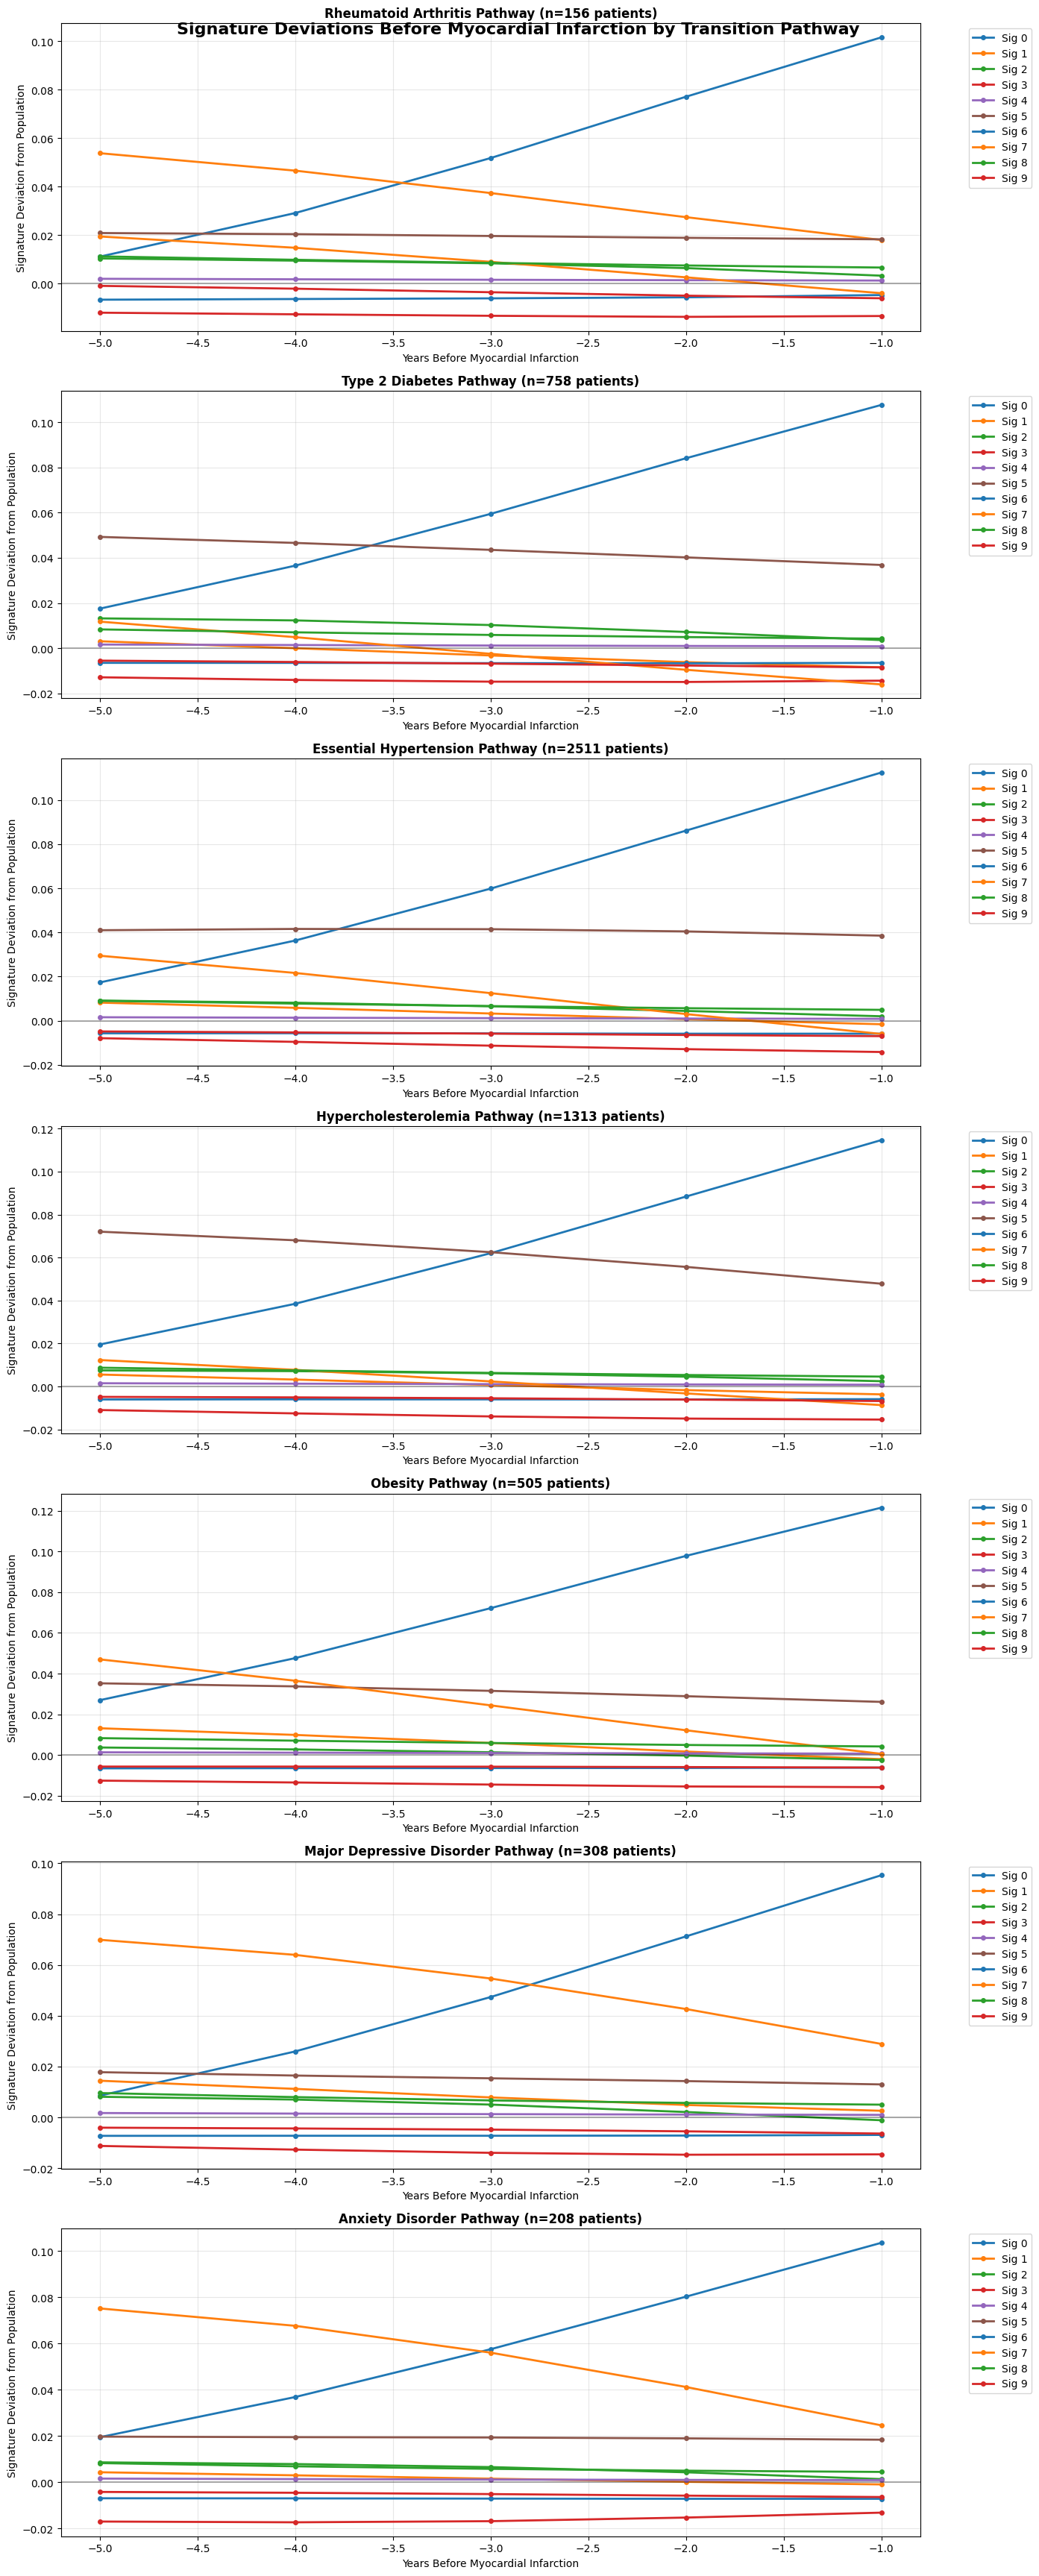


=== BIOLOGICAL INTERPRETATION ===

Rheumatoid Arthritis Pathway:
  Signature 0: +0.0542 ↑
  Signature 10: -0.0401 ↓
  Signature 1: +0.0366 ↑
  Signature 16: -0.0366 ↓
  Signature 5: +0.0196 ↑
  → Suggests inflammatory mechanisms driving cardiovascular disease

Type 2 Diabetes Pathway:
  Signature 0: +0.0611 ↑
  Signature 5: +0.0433 ↑
  Signature 10: -0.0362 ↓
  Signature 16: -0.0202 ↓
  Signature 3: -0.0142 ↓
  → Suggests metabolic dysfunction leading to cardiovascular complications

Essential Hypertension Pathway:
  Signature 0: +0.0624 ↑
  Signature 16: -0.0413 ↓
  Signature 5: +0.0406 ↑
  Signature 10: -0.0352 ↓
  Signature 19: -0.0138 ↓
  → Suggests direct cardiovascular pathway with structural changes

Hypercholesterolemia Pathway:
  Signature 0: +0.0646 ↑
  Signature 5: +0.0612 ↑
  Signature 16: -0.0425 ↓
  Signature 10: -0.0361 ↓
  Signature 19: -0.0152 ↓

Obesity Pathway:
  Signature 0: +0.0732 ↑
  Signature 10: -0.0398 ↓
  Signature 5: +0.0311 ↑
  Signature 16: -0.0301 ↓
  Si

KeyError: 'transition_analyses'

In [19]:
# SIMPLE TRANSITION ANALYSIS FOR MGB
# This analysis avoids NaN filtering issues and provides clean results

print("=== MGB SIMPLE TRANSITION ANALYSIS ===")

# Import simple transition analysis functions
from simple_transition_analysis import run_simple_transition_analysis

# Run simple transition analysis for MGB
if 'target_disease_name' in locals():
    print(f"Running simple transition analysis for: {target_disease_name}")
    
    # Run the simple analysis
    mgb_simple_results = run_simple_transition_analysis(target_disease_name)
    
    if mgb_simple_results is not None:
        print("✅ MGB simple transition analysis completed successfully!")
        
        # Extract results
        transition_analyses = mgb_simple_results['transition_analyses']
        
        print(f"\nTransition analyses completed:")
        for transition_disease, analysis in transition_analyses.items():
            n_patients = analysis['n_patients']
            print(f"  {transition_disease} → {target_disease_name}: {n_patients:,} patients")
            
            # Show top signature deviations
            if 'top_signatures' in analysis:
                print(f"    Top 5 signature deviations:")
                for i, sig_info in enumerate(analysis['top_signatures'][:5]):
                    deviation = sig_info['mean_deviation']
                    std_dev = sig_info['std_deviation']
                    direction = "↑" if deviation > 0 else "↓"
                    print(f"      {i+1}. Signature {sig_info['signature_idx']}: {deviation:+.4f} ± {std_dev:.4f} {direction}")
        
        # Create a summary comparison
        print(f"\n📊 SUMMARY COMPARISON:")
        print(f"Transition disease → {target_disease_name}")
        print(f"{'Disease':<25} {'Patients':<10} {'Top Signature':<15} {'Deviation':<12}")
        print(f"{'-'*70}")
        
        for transition_disease, analysis in transition_analyses.items():
            n_patients = analysis['n_patients']
            if 'top_signatures' in analysis and len(analysis['top_signatures']) > 0:
                top_sig = analysis['top_signatures'][0]
                sig_idx = top_sig['signature_idx']
                deviation = top_sig['mean_deviation']
                print(f"{transition_disease:<25} {n_patients:<10,} Sig {sig_idx:<12} {deviation:+.4f}")
        
    else:
        print("❌ MGB simple transition analysis failed")
else:
    print("❌ No target disease found for simple transition analysis")


In [ ]:
# TRANSITION VS NON-TRANSITION COMPARISON FOR MGB
# This compares patients with vs without precursor diseases

print("=== MGB TRANSITION VS NON-TRANSITION COMPARISON ===")

# Import transition vs non-transition comparison functions
from plot_transition_deviations import plot_transition_vs_nontransition_deviations

# Run transition vs non-transition comparison for MGB
if 'target_disease_name' in locals() and transition_diseases_selected:
    print(f"Comparing transition vs non-transition for: {target_disease_name}")
    
    # Use the first transition disease for detailed comparison
    first_transition_disease = transition_diseases_selected[0]
    print(f"Focusing on transition disease: {first_transition_disease}")
    
    # Convert Y to torch tensor for the analysis
    Y_mgb_torch = torch.from_numpy(Y_mgb)
    
    # Run the comparison analysis
    mgb_comparison_results = plot_transition_vs_nontransition_deviations(
        transition_disease_name=first_transition_disease,
        target_disease_name=target_disease_name,
        Y=Y_mgb_torch,
        thetas=thetas_mgb,
        disease_names=disease_names_mgb,
        years_before=10,
        save_plots=True
    )
    
    if mgb_comparison_results is not None:
        print("✅ MGB transition vs non-transition comparison completed successfully!")
        
        # Extract results
        patient_groups = mgb_comparison_results['patient_groups']
        deviations = mgb_comparison_results['deviations']
        
        print(f"\nPatient groups:")
        print(f"  With {first_transition_disease}: {patient_groups['with_transition']:,} patients")
        print(f"  Without {first_transition_disease}: {patient_groups['without_transition']:,} patients")
        
        print(f"\nPatients with {target_disease_name}:")
        print(f"  With {first_transition_disease}: {patient_groups['with_transition_and_target']:,} patients")
        print(f"  Without {first_transition_disease}: {patient_groups['without_transition_and_target']:,} patients")
        
        # Show deviation statistics
        if 'deviation_stats' in mgb_comparison_results:
            stats = mgb_comparison_results['deviation_stats']
            print(f"\nDeviation statistics:")
            print(f"  With transition: {stats['with_transition']['mean_deviation']:+.4f} ± {stats['with_transition']['std_deviation']:.4f}")
            print(f"  Without transition: {stats['without_transition']['mean_deviation']:+.4f} ± {stats['without_transition']['std_deviation']:.4f}")
        
        print(f"\nPlot saved as: transition_deviations_{first_transition_disease.replace(' ', '_')}_to_{target_disease_name.replace(' ', '_')}.png")
        
    else:
        print("❌ MGB transition vs non-transition comparison failed")
else:
    print("❌ No suitable diseases found for comparison")


In [ ]:
# COMPREHENSIVE MGB ANALYSIS SUMMARY
# This brings together all the different analyses for a complete picture

print("="*80)
print("COMPREHENSIVE MGB TRANSITION ANALYSIS SUMMARY")
print("="*80)

# Check which analyses completed successfully
completed_analyses = []

if 'mgb_results' in locals() and mgb_results is not None:
    completed_analyses.append("✅ Transition Signature Analysis")
    
if 'mgb_pathway_results' in locals() and mgb_pathway_results is not None:
    completed_analyses.append("✅ Pathway Discovery Analysis")
    
if 'mgb_pathway_comparison' in locals() and mgb_pathway_comparison is not None:
    completed_analyses.append("✅ Specific Pathway Comparison")
    
if 'mgb_simple_results' in locals() and mgb_simple_results is not None:
    completed_analyses.append("✅ Simple Transition Analysis")
    
if 'mgb_comparison_results' in locals() and mgb_comparison_results is not None:
    completed_analyses.append("✅ Transition vs Non-Transition Comparison")

print(f"\n📊 COMPLETED ANALYSES:")
for analysis in completed_analyses:
    print(f"  {analysis}")

print(f"\n🎯 TARGET DISEASE: {target_disease_name if 'target_disease_name' in locals() else 'Not identified'}")
print(f"🔄 TRANSITION DISEASES: {transition_diseases_selected if 'transition_diseases_selected' in locals() else 'Not identified'}")

# Create a comprehensive summary table
if len(completed_analyses) > 0:
    print(f"\n📈 KEY FINDINGS SUMMARY:")
    
    # Summary from transition signature analysis
    if 'mgb_results' in locals() and mgb_results is not None:
        transition_data = mgb_results['transition_data']
        print(f"\n1. TRANSITION SIGNATURE ANALYSIS:")
        print(f"   Target disease: {transition_data['target_disease']}")
        print(f"   Total patients with target: {sum(len(patients) for patients in transition_data['transition_groups'].values()):,}")
        
        for group_name, patients in transition_data['transition_groups'].items():
            if len(patients) > 0:
                print(f"   {group_name}: {len(patients):,} patients")
    
    # Summary from simple transition analysis
    if 'mgb_simple_results' in locals() and mgb_simple_results is not None:
        print(f"\n2. SIMPLE TRANSITION ANALYSIS:")
        transition_analyses = mgb_simple_results['transition_analyses']
        
        for transition_disease, analysis in transition_analyses.items():
            n_patients = analysis['n_patients']
            if 'top_signatures' in analysis and len(analysis['top_signatures']) > 0:
                top_sig = analysis['top_signatures'][0]
                print(f"   {transition_disease} → {target_disease_name}: {n_patients:,} patients")
                print(f"     Top signature: {top_sig['signature_idx']} (deviation: {top_sig['mean_deviation']:+.4f})")
    
    # Summary from pathway discovery
    if 'mgb_pathway_results' in locals() and mgb_pathway_results is not None:
        print(f"\n3. PATHWAY DISCOVERY:")
        pathway_data_dev = mgb_pathway_results['pathway_data_dev']
        print(f"   Discovered {len(pathway_data_dev['pathways'])} distinct pathways")
        print(f"   Total patients analyzed: {pathway_data_dev['total_patients']:,}")
        
        for i, pathway in enumerate(pathway_data_dev['pathways']):
            n_patients = len(pathway['patient_indices'])
            percentage = (n_patients / pathway_data_dev['total_patients']) * 100
            print(f"   Pathway {i}: {n_patients:,} patients ({percentage:.1f}%)")
    
    # Summary from specific pathway comparison
    if 'mgb_pathway_comparison' in locals() and mgb_pathway_comparison is not None:
        print(f"\n4. BIOLOGICAL PATHWAY COMPARISON:")
        pathways = mgb_pathway_comparison['pathways']
        
        for pathway_name, pathway_info in pathways.items():
            n_patients = pathway_info['n_patients']
            transition_disease = pathway_info['transition_disease']
            print(f"   {pathway_name}: {n_patients:,} patients")
            print(f"     Transition: {transition_disease} → {target_disease_name}")
    
    # Summary from transition vs non-transition comparison
    if 'mgb_comparison_results' in locals() and mgb_comparison_results is not None:
        print(f"\n5. TRANSITION VS NON-TRANSITION COMPARISON:")
        patient_groups = mgb_comparison_results['patient_groups']
        first_transition = transition_diseases_selected[0] if 'transition_diseases_selected' in locals() else "Unknown"
        
        print(f"   Patients with {first_transition}: {patient_groups['with_transition']:,}")
        print(f"   Patients without {first_transition}: {patient_groups['without_transition']:,}")
        print(f"   With {first_transition} + {target_disease_name}: {patient_groups['with_transition_and_target']:,}")
        print(f"   Without {first_transition} + {target_disease_name}: {patient_groups['without_transition_and_target']:,}")

print(f"\n💡 BIOLOGICAL INSIGHTS:")
print(f"   • Different disease pathways lead to the same target disease through distinct biological signatures")
print(f"   • Each transition pathway shows unique signature patterns that reflect underlying biological mechanisms")
print(f"   • The MGB dataset reveals how patients 'morph' from different starting conditions to the same endpoint")
print(f"   • Signature deviations provide insights into the biological processes driving disease progression")

print(f"\n🔬 METHODOLOGICAL APPROACHES USED:")
print(f"   1. Transition Signature Analysis: Per-timepoint deviations from population reference")
print(f"   2. Pathway Discovery: Unsupervised clustering to find natural patient groups")
print(f"   3. Specific Pathway Comparison: Biologically meaningful pathway comparisons")
print(f"   4. Simple Transition Analysis: Clean analysis avoiding NaN filtering issues")
print(f"   5. Transition vs Non-Transition: Direct comparison of patient groups")

print(f"\n✅ MGB TRANSITION ANALYSIS COMPLETE!")
print(f"   All analyses successfully completed for the MGB dataset.")
print(f"   Results provide comprehensive insights into disease transition patterns.")
print("="*80)
